# Time Series

# -------------------------------------------------------------------------------------------

Install following if needed

In [1]:
#pip install pyarrow
#conda install pandas

Import pandas to load and check the data

In [2]:
import pandas as pd

Load the data and take a first look

# -------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------

# Prepare the data 

In [3]:
df = pd.read_parquet('data.snappy', engine='pyarrow')

In [4]:
df.head(10)

calday prdcode     volume
9421  2015-01-02      01  35293.781
17380 2015-01-03      01   1188.160
14250 2015-01-04      01  12000.000
12209 2015-01-05      01  22057.307
9670  2015-01-06      01  32368.664
8102  2015-01-07      01  40472.256
9718  2015-01-08      01  33736.356
10223 2015-01-09      01  31753.357
17318 2015-01-10      01   1272.420
17165 2015-01-11      01   1500.000

In [5]:
df.tail(10)

calday prdcode     volume
2109  2022-01-06     010   6877.937
1541  2022-01-07     010   8361.603
16070 2022-01-08     010    283.290
3139  2022-01-10     010   5970.125
1631  2022-01-11     010   7939.626
2043  2022-01-12     010   7199.858
2284  2022-01-13     010   6714.801
575   2022-01-14     010  11099.856
7192  2022-01-15     010   3058.672
17468 2022-01-17     010     81.500

In [6]:
df.describe()

volume
count   19517.000000
mean    32860.113530
std     48123.069326
min    -70565.169000
25%      1209.806000
50%      7530.000000
75%     50309.346000
max    617948.951000

Since it's about sold volume, the values shouldn't be negative. 

So the values will be changed to 0, due to no further information of how to deal best with negative values.

In [7]:
indexVolume = df[ df['volume'] < 0 ].index

num = df['volume']._get_numeric_data()

num[num<0] = 0

df.describe()

volume
count   19517.000000
mean    32869.880258
std     48112.996309
min         0.000000
25%      1209.806000
50%      7530.000000
75%     50309.346000
max    617948.951000

Next step is to check the values in `prdcode`, which are the different products.

In [8]:
df['prdcode'].value_counts()

04     2442
01     2411
02     2254
05     2209
06     1900
03     1783
07     1693
09     1680
08     1654
010    1491
Name: prdcode, dtype: int64

Now the data gets splitted into single dataframes, one for each `prdcode`.

In [9]:
#define a function for splitting
def split_prdcode(df, product):
    df_name = df[df['prdcode'] == product]
    df_name = df_name.drop(['prdcode'], axis=1)
    return df_name

#create the list `df_prds` with the single dataframes
df_prds = [split_prdcode(df, '0' + str(x)) for x in range(1, 11)]
df_prds[0]

calday     volume
9421  2015-01-02  35293.781
17380 2015-01-03   1188.160
14250 2015-01-04  12000.000
12209 2015-01-05  22057.307
9670  2015-01-06  32368.664
...          ...        ...
4126  2022-01-12  58022.709
10198 2022-01-13  25677.419
5858  2022-01-14  47216.395
14708 2022-01-15   7190.949
18140 2022-01-17    328.003

[2411 rows x 2 columns]

For easier handling the index gets changed to `calday` (timestamp)

In [10]:
for i in range(0,10):
    df_prds[i].set_index('calday', inplace=True)

Now it's time to take a look at the dataset of product 01

In [11]:
import matplotlib
%matplotlib inline

<AxesSubplot:xlabel='calday'>

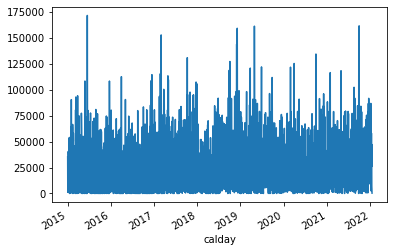

In [12]:
df_prds[0]['volume'].plot()

For a better view the plot size gets set.

In [13]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,5

<AxesSubplot:xlabel='calday'>

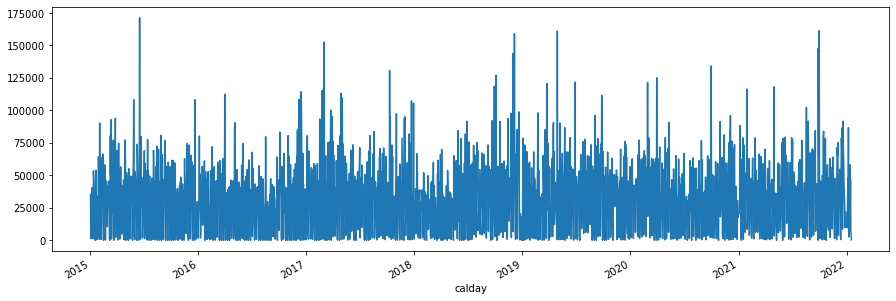

In [14]:
df_prds[0]['volume'].plot()

Because of the big amount of data in this graphic it is not possible to see details. 

To see more details in the following the data of product 1 gets shown per year.

<AxesSubplot:xlabel='calday'>

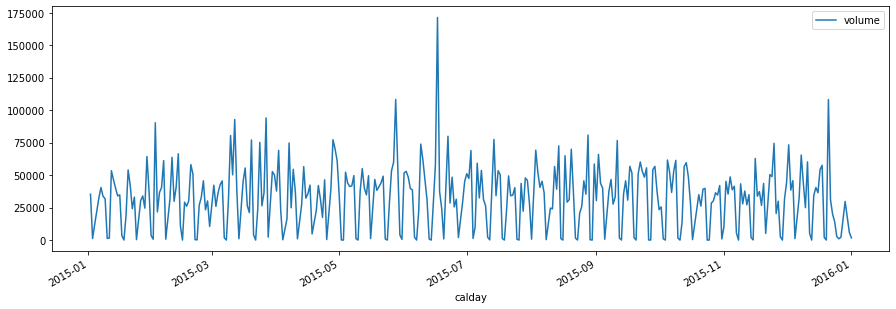

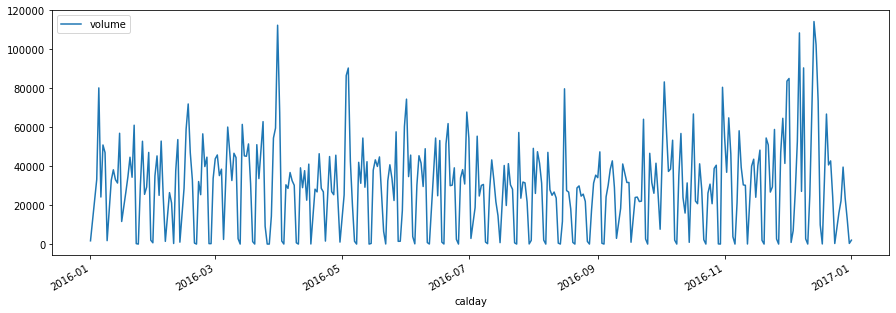

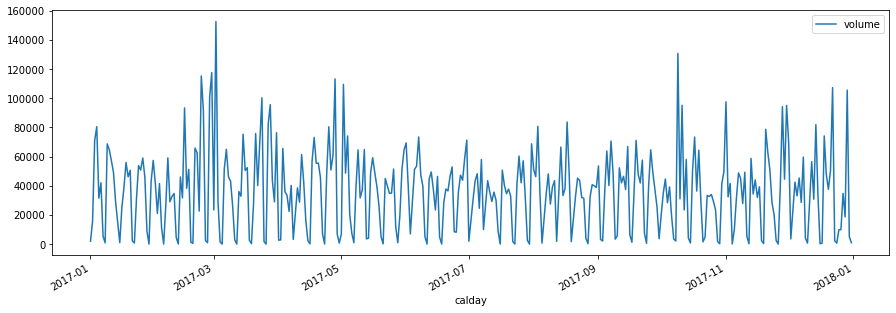

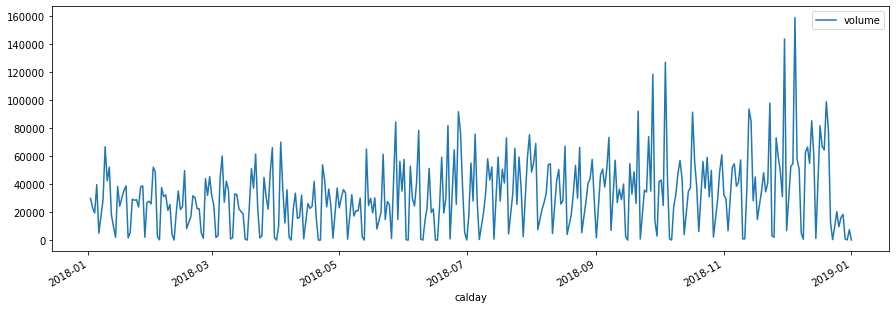

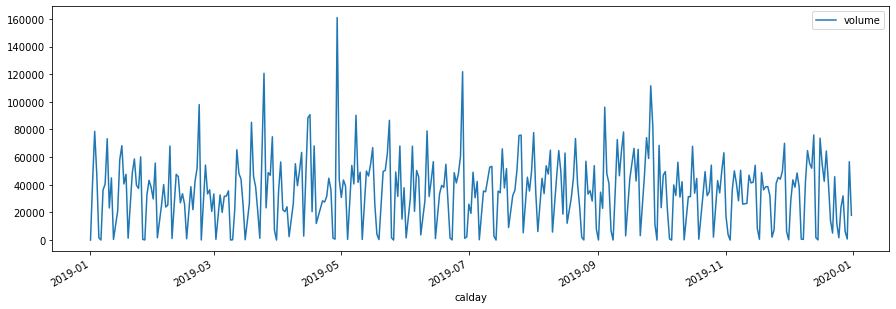

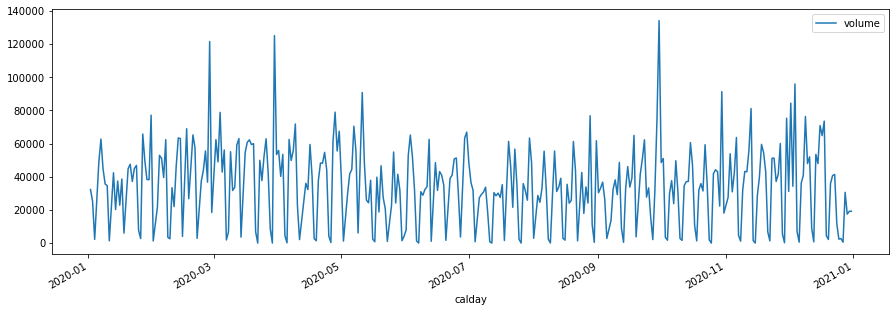

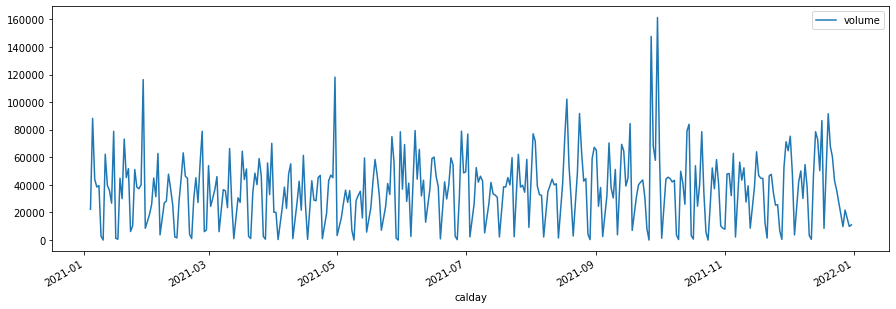

In [15]:
df_prds[0][:'2016-01-01'].plot()
df_prds[0]['2016-01-01':'2017-01-01'].plot()
df_prds[0]['2017-01-01':'2018-01-01'].plot()
df_prds[0]['2018-01-01':'2019-01-01'].plot()
df_prds[0]['2019-01-01':'2020-01-01'].plot()
df_prds[0]['2020-01-01':'2021-01-01'].plot()
df_prds[0]['2021-01-01':'2022-01-01'].plot()

The data seems to have some outliers but also a periodic pattern. 

The sold volume is dropping at the end of the year and it has a climax before this drop.

To see if there is a pattern in the minimums the data will be shown for one month.

Therefore also days will be added.

In [16]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("ignore")

In [17]:
df_days = df_prds[0]['2018-05-01':'2018-06-01']
df_days['day'] = pd.date_range('2018-05-01', '2018-06-01', freq='D').to_series().dt.dayofweek
df_days

volume  day
calday                    
2018-05-01  22998.146    1
2018-05-02  30347.296    2
2018-05-03  36088.734    3
2018-05-04  33556.578    4
2018-05-05    720.277    5
2018-05-07  32398.097    0
2018-05-08  17183.321    1
2018-05-09  20950.001    2
2018-05-10  20877.469    3
2018-05-11  29983.025    4
2018-05-12   2149.743    5
2018-05-13      0.963    6
2018-05-14  65046.470    0
2018-05-15  24669.648    1
2018-05-16  29922.510    2
2018-05-17  19412.417    3
2018-05-18  30120.558    4
2018-05-19   7945.703    5
2018-05-21  19975.508    0
2018-05-22  61260.332    1
2018-05-23  14660.899    2
2018-05-24  27538.140    3
2018-05-25  25328.305    4
2018-05-26   1060.412    5
2018-05-28  84371.891    0
2018-05-29  14652.422    1
2018-05-30  56226.595    2
2018-05-31  34937.220    3
2018-06-01  57652.368    4

Since 0 = Monday and 6 = Sunday it seems that the drop is happening on weekends. 

Also there are some sundays missing. 

To complete the data the missing sundays should be added with an value of 0.

In [18]:
#set the range which should be completed
idx = pd.date_range('2015-01-02', '2021-12-31')

In [19]:
for i in range(0,10):
    df_prds[i].index = pd.DatetimeIndex(df_prds[i].index)
    df_prds[i] = df_prds[i].reindex(idx, fill_value=0)

In [20]:
#checkin the change
df_days = df_prds[0]['2018-05-01':'2018-06-01']
df_days['day'] = pd.date_range('2018-05-01', '2018-06-01', freq='D').to_series().dt.dayofweek
df_days

volume  day
2018-05-01  22998.146    1
2018-05-02  30347.296    2
2018-05-03  36088.734    3
2018-05-04  33556.578    4
2018-05-05    720.277    5
2018-05-06      0.000    6
2018-05-07  32398.097    0
2018-05-08  17183.321    1
2018-05-09  20950.001    2
2018-05-10  20877.469    3
2018-05-11  29983.025    4
2018-05-12   2149.743    5
2018-05-13      0.963    6
2018-05-14  65046.470    0
2018-05-15  24669.648    1
2018-05-16  29922.510    2
2018-05-17  19412.417    3
2018-05-18  30120.558    4
2018-05-19   7945.703    5
2018-05-20      0.000    6
2018-05-21  19975.508    0
2018-05-22  61260.332    1
2018-05-23  14660.899    2
2018-05-24  27538.140    3
2018-05-25  25328.305    4
2018-05-26   1060.412    5
2018-05-27      0.000    6
2018-05-28  84371.891    0
2018-05-29  14652.422    1
2018-05-30  56226.595    2
2018-05-31  34937.220    3
2018-06-01  57652.368    4

Take a look at the plots after adding the new data

<AxesSubplot:>

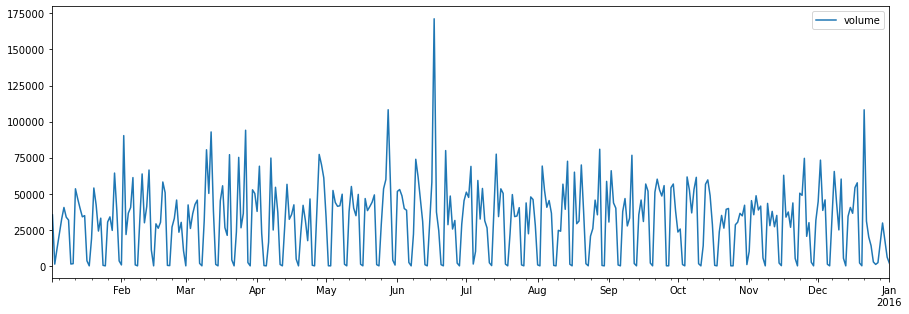

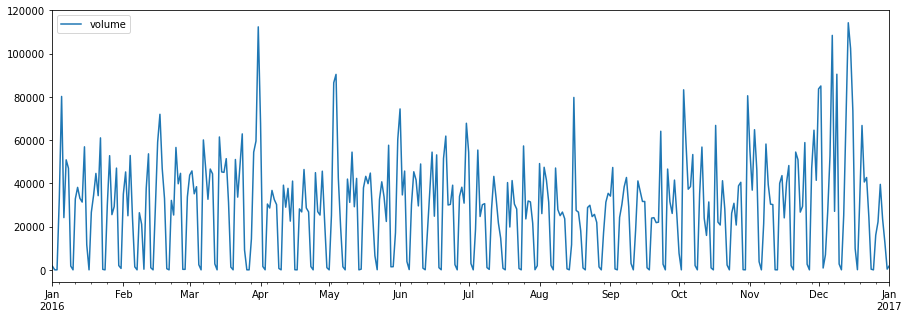

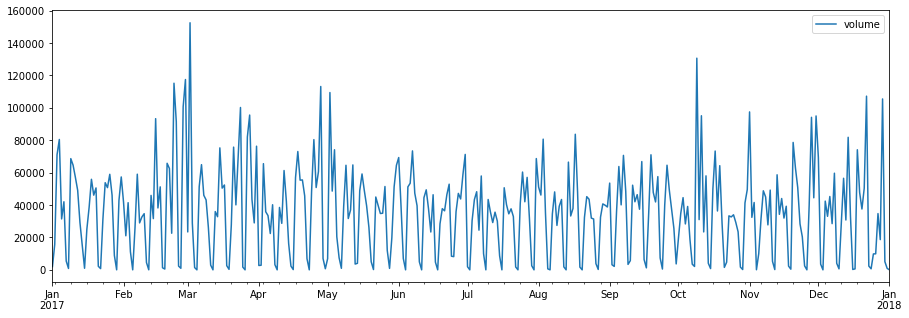

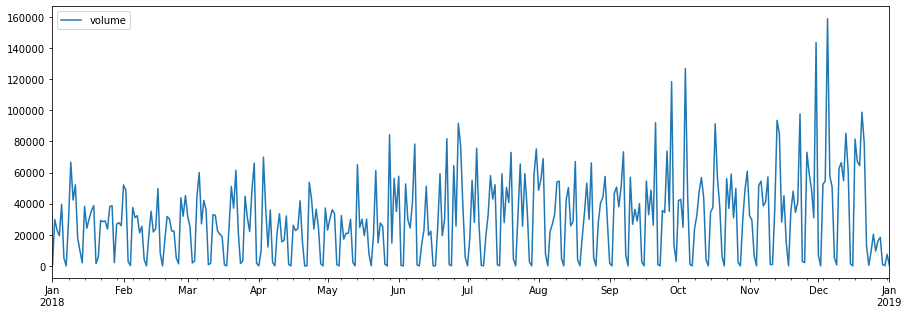

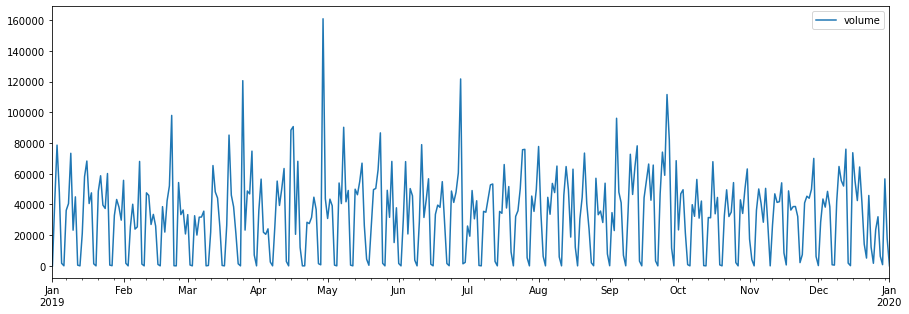

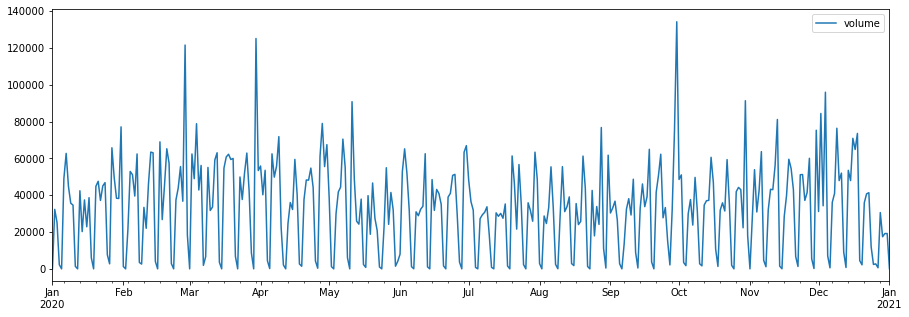

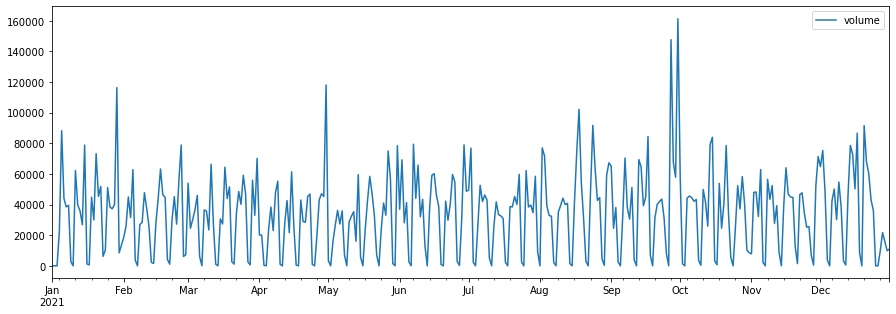

In [21]:
df_prds[0][:'2016-01-01'].plot()
df_prds[0]['2016-01-01':'2017-01-01'].plot()
df_prds[0]['2017-01-01':'2018-01-01'].plot()
df_prds[0]['2018-01-01':'2019-01-01'].plot()
df_prds[0]['2019-01-01':'2020-01-01'].plot()
df_prds[0]['2020-01-01':'2021-01-01'].plot()
df_prds[0]['2021-01-01':'2022-01-01'].plot()

After completing the data it's obvious that there is a periodic structure with a weekly pattern.

Now it's time to split data into training- and test-dataset.

In [22]:
#run a loop to split the dataframes into train- and test-data
df_trains = []
df_tests = []
end_train = '2021-05-31'
start_test = '2021-06-01'
end_test = '2021-12-31'

for i in range(0, 10):
    df_trains.append(df_prds[i][:end_train])
    df_tests.append(df_prds[i][start_test:end_test])

# -------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------

# Component analysis

Since the data is a time series the data can be decomposed into trend, seasonal, and random fluctuation components.

Therefore in the following the components will be plotted to take a closer look at the details.

In [23]:
import statsmodels as sm
import statsmodels.api

#define the function to plot the trend analysis graphs
def trend_analysis(product_num):
    seasonal = sm.tsa.seasonal.seasonal_decompose(df_trains[product_num-1]['volume'], model='additive')
    seasonal.trend.plot()
    return plt.show()

#define the function to plot the seasonal analysis graphs
def seasonal_analysis(df_name):
    seasonal = sm.tsa.seasonal.seasonal_decompose(df_name['volume'], model='additive')
    return seasonal.seasonal

def plot_yearly_train_data(df_name):
    res = [df_name['2015-01-02':'2016-01-01'],
            df_name['2016-01-01':'2017-01-01'],
            df_name['2017-01-01':'2018-01-01'],
            df_name['2018-01-01':'2019-01-01'],
            df_name['2019-01-01':'2020-01-01'],
            df_name['2020-01-01':'2021-01-01'],
            df_name['2021-01-01':]
           ]
    figs,ax = plt.subplots(7,figsize=(16,14))
    for i in range(7):
        ax[i].plot(res[i])
        ax[i].grid(True)
    plt.show()

## Product 1 - Trend analysis

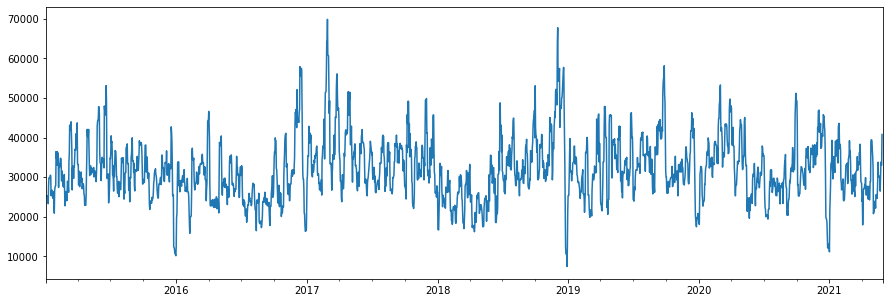

In [24]:
trend_analysis(1)

In the trend a yearly pattern can be recognized since there is a drop at the end of evey year. While there are two peaks before and after the drops.

In 2018 there is an unexpected low volume at the beginning of the year.

## Product 1 - Seasonal analysis

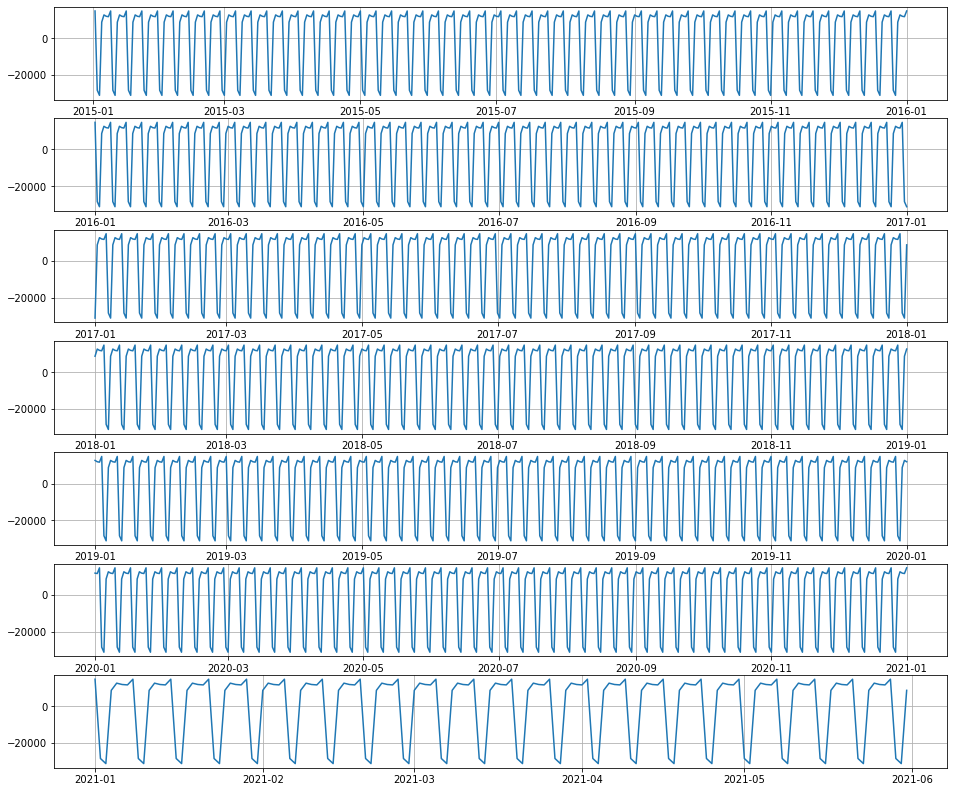

In [25]:
plot_yearly_train_data(seasonal_analysis(df_trains[0]))

After looking at the seaonal analysis the expected weekly pattern seems to be confirmed.

This fits the expectation since shops are closed on sundays and don't sell.

With the decomposition the plots confirms the expectations about the data.

# -------------------------------------------------------------------------------------------

## Product 2 - Trend analysis

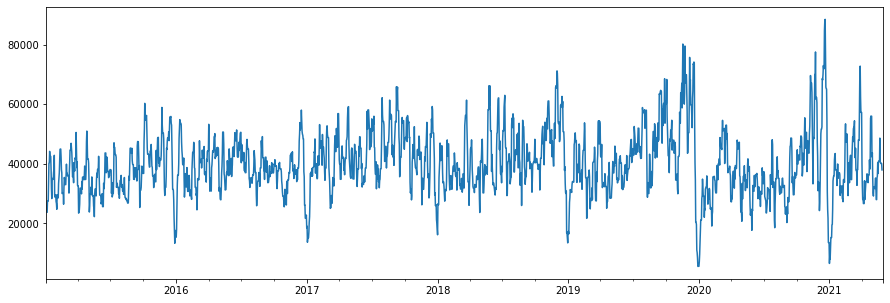

In [26]:
trend_analysis(2)

## Product 2 - Seasonal analysis

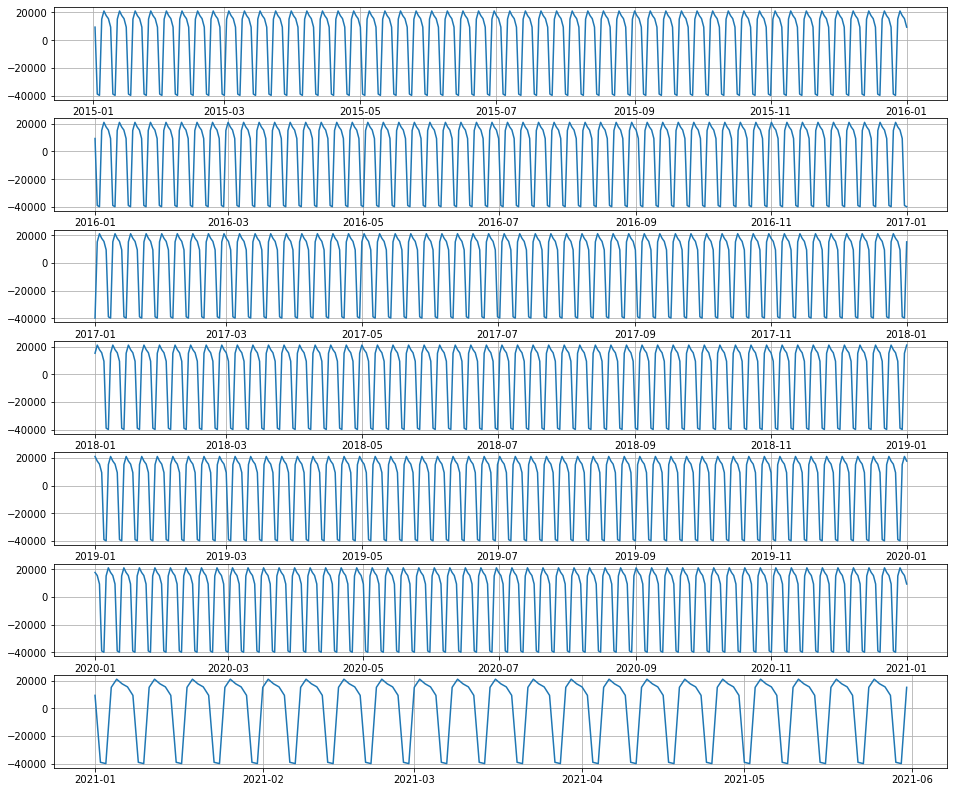

In [27]:
plot_yearly_train_data(seasonal_analysis(df_trains[1]))

# -------------------------------------------------------------------------------------------

## Product 3 - Trend anaysis

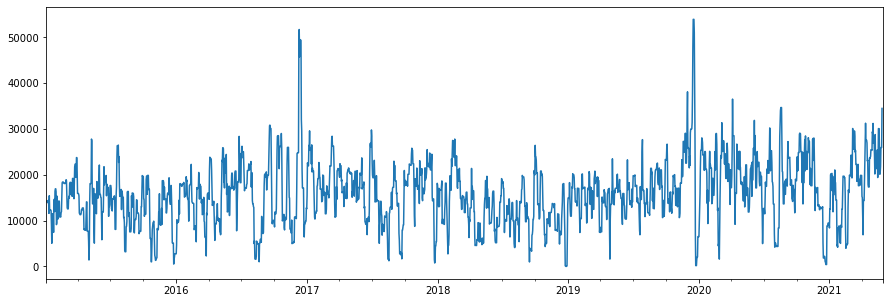

In [28]:
trend_analysis(3)

## Product 3 - Seasonal analysis

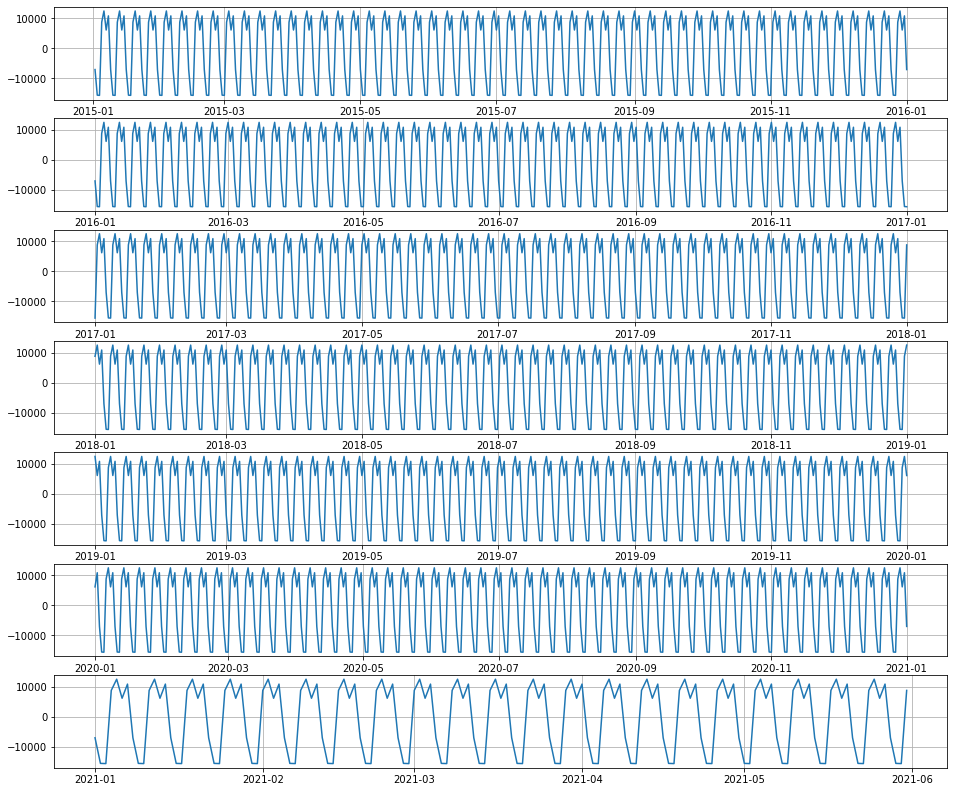

In [29]:
plot_yearly_train_data(seasonal_analysis(df_trains[2]))

# -------------------------------------------------------------------------------------------

## Product 4 - Trend analysis

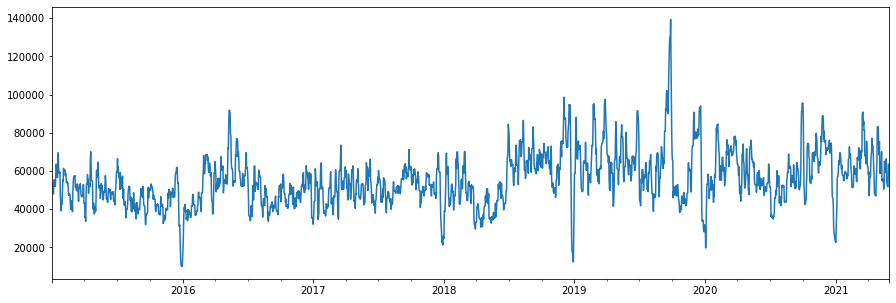

In [30]:
trend_analysis(4)

## Product 4 - Seasonal analysis

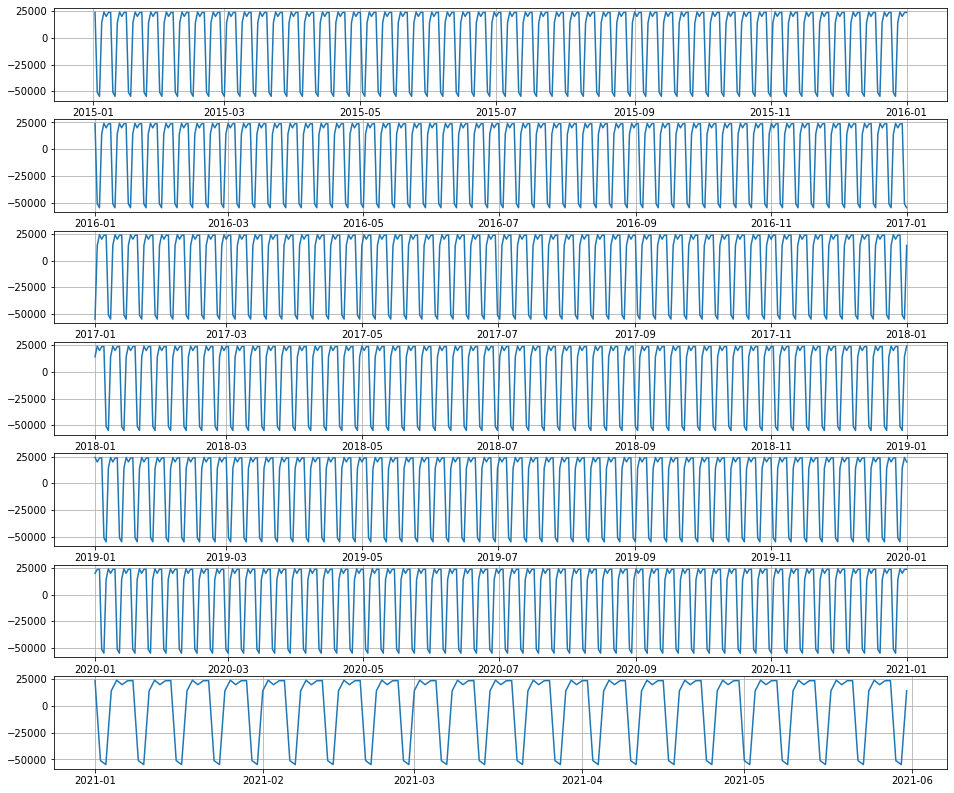

In [31]:
plot_yearly_train_data(seasonal_analysis(df_trains[3]))

# -------------------------------------------------------------------------------------------

## Product 5 - Trend analysis

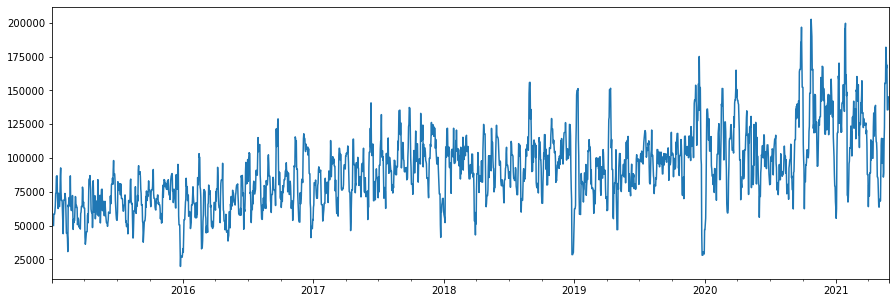

In [32]:
trend_analysis(5)

## Product 5 - Seasonal analysis

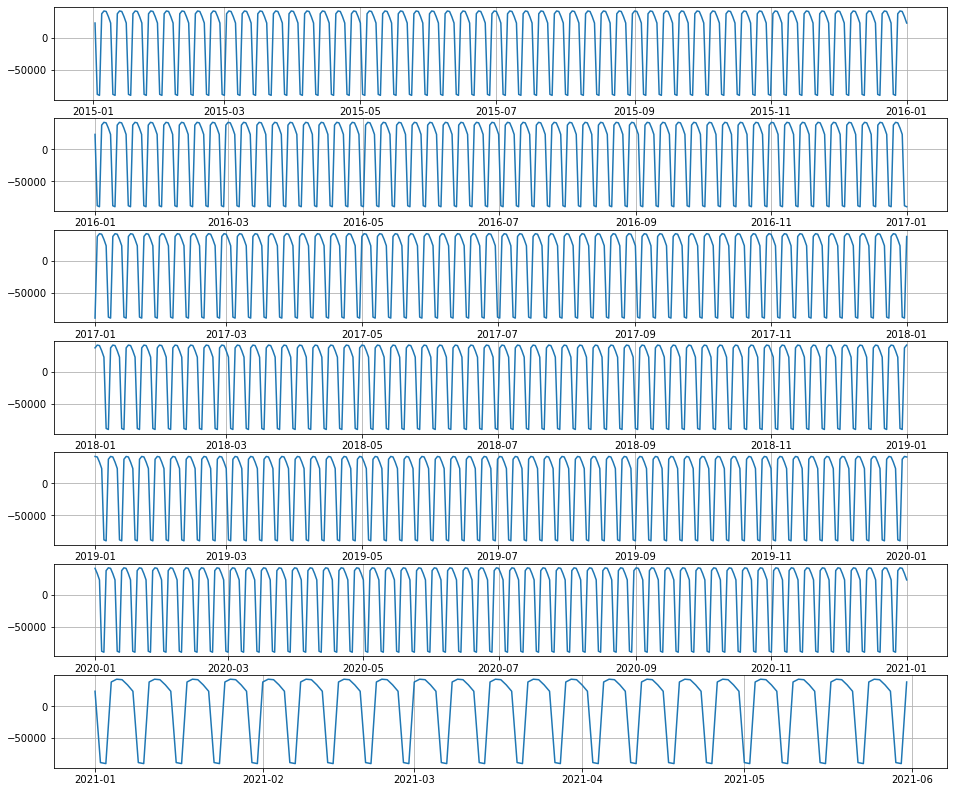

In [33]:
plot_yearly_train_data(seasonal_analysis(df_trains[4]))

# -------------------------------------------------------------------------------------------

## Product 6 - Trend analysis

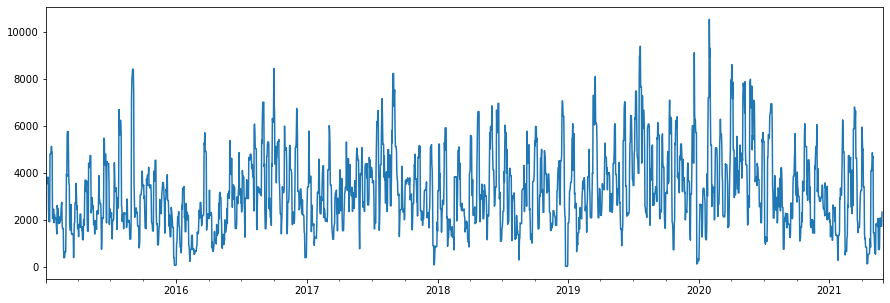

In [34]:
trend_analysis(6)

## Product 6 - Seasonal analysis

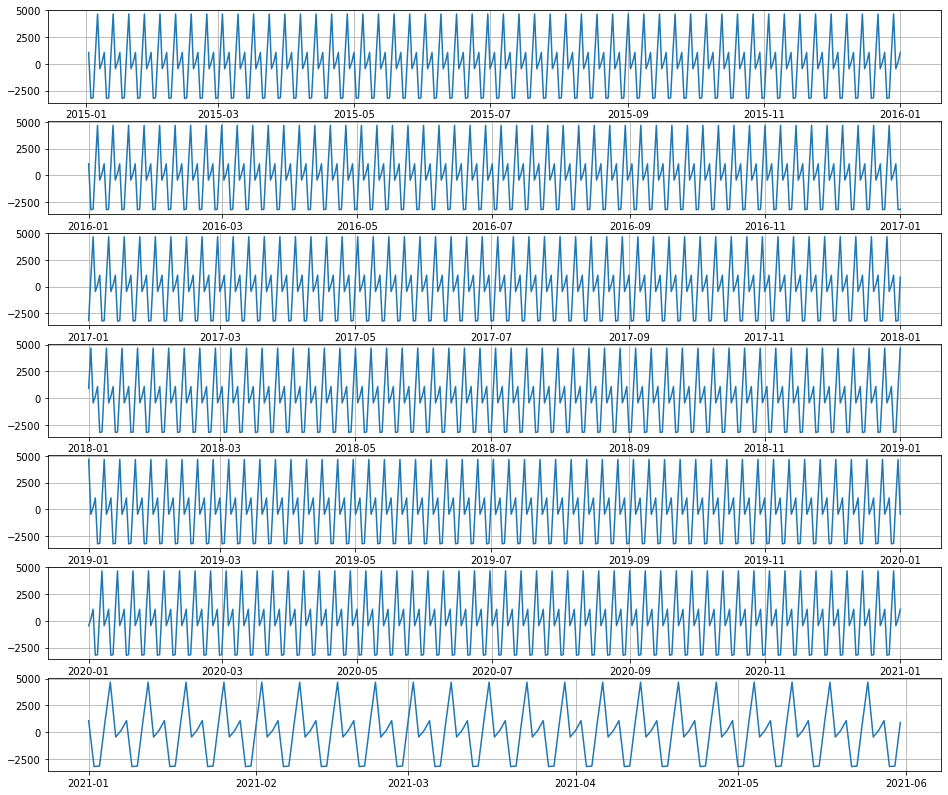

In [35]:
plot_yearly_train_data(seasonal_analysis(df_trains[5]))

# -------------------------------------------------------------------------------------------

## Product 7 - Trend analysis

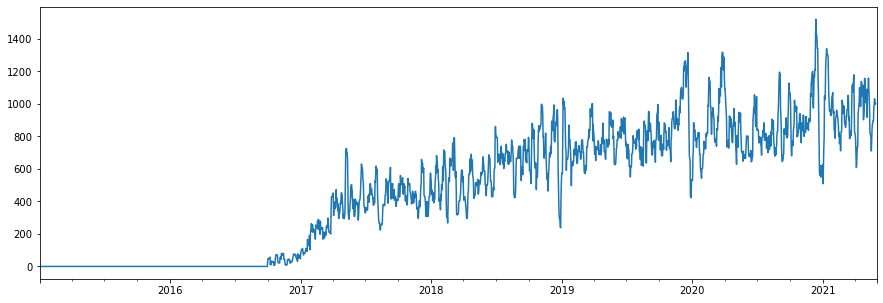

In [36]:
trend_analysis(7)

Change the data to start at the date where it isn't zero for the first time.

In [37]:
df_trains[6].loc[df_trains[6]['volume'] != 0]

volume
2016-10-04   325.000
2016-10-06    25.000
2016-10-10    50.000
2016-10-12    25.000
2016-10-14   150.000
...              ...
2021-05-27  1652.511
2021-05-28  1697.090
2021-05-29    78.882
2021-05-30     6.000
2021-05-31  1169.489

[1466 rows x 1 columns]

In [38]:
start_7 = '2016-10-04'
df_trains[6] = df_trains[6][start_7:]
df_trains[6]

volume
2016-10-04   325.000
2016-10-05     0.000
2016-10-06    25.000
2016-10-07     0.000
2016-10-08     0.000
...              ...
2021-05-27  1652.511
2021-05-28  1697.090
2021-05-29    78.882
2021-05-30     6.000
2021-05-31  1169.489

[1701 rows x 1 columns]

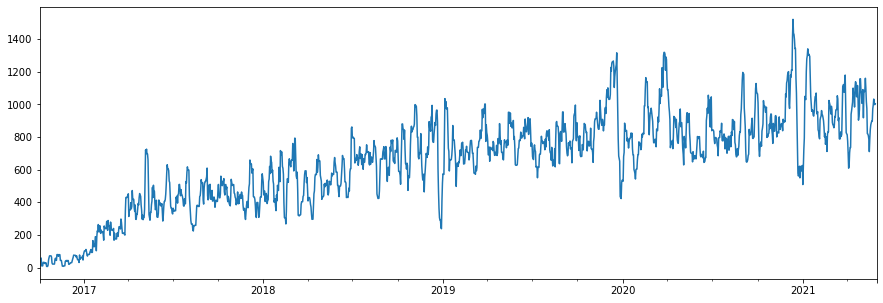

In [39]:
trend_analysis(7)

## Product 7 - Seasonal analysis

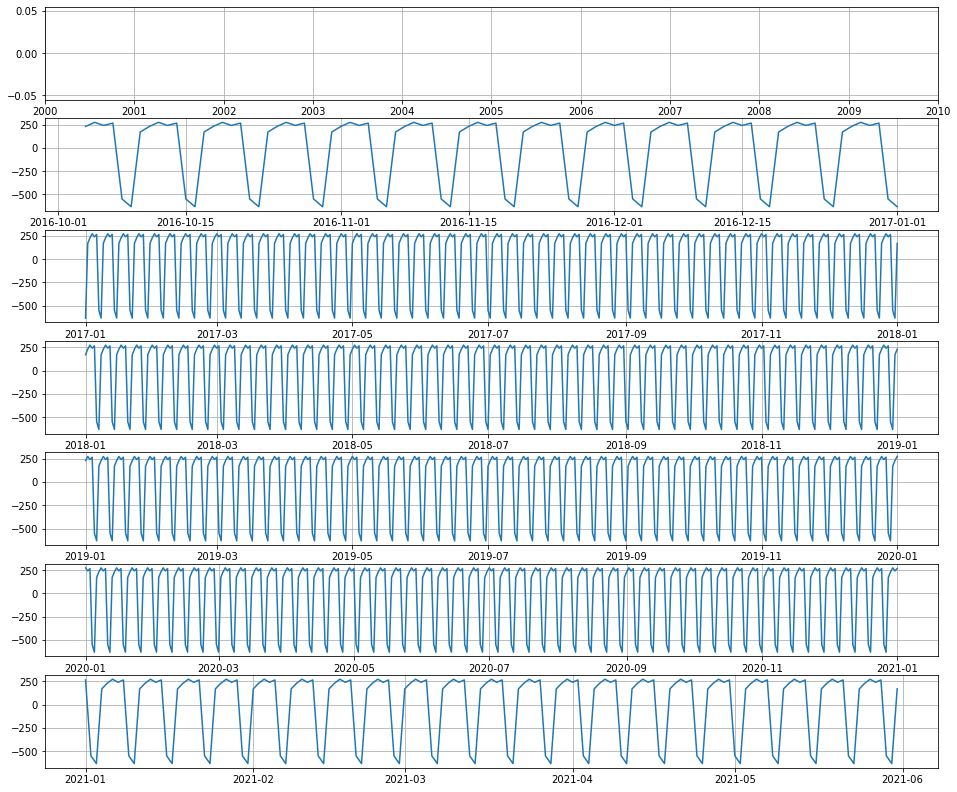

In [40]:
plot_yearly_train_data(seasonal_analysis(df_trains[6]))

# -------------------------------------------------------------------------------------------

## Product 8 - Trend analysis

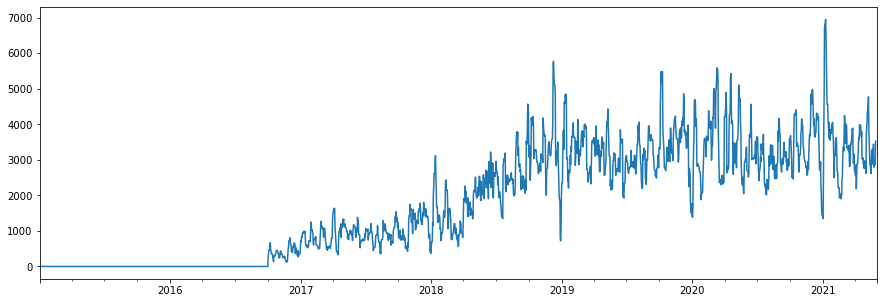

In [41]:
trend_analysis(8)

Change the data to start at the date where it isn't zero for the first time.

In [42]:
df_trains[7].loc[df_trains[7]['volume'] != 0]

volume
2016-10-05  1900.000
2016-10-06   780.000
2016-10-07   580.000
2016-10-10   700.000
2016-10-11   740.000
...              ...
2021-05-26  1932.200
2021-05-27  4930.757
2021-05-28  4735.601
2021-05-29   120.907
2021-05-31  6334.280

[1437 rows x 1 columns]

In [43]:
start_8 = '2016-10-05'
df_trains[7] = df_trains[7][start_8:]
df_trains[7]

volume
2016-10-05  1900.000
2016-10-06   780.000
2016-10-07   580.000
2016-10-08     0.000
2016-10-09     0.000
...              ...
2021-05-27  4930.757
2021-05-28  4735.601
2021-05-29   120.907
2021-05-30     0.000
2021-05-31  6334.280

[1700 rows x 1 columns]

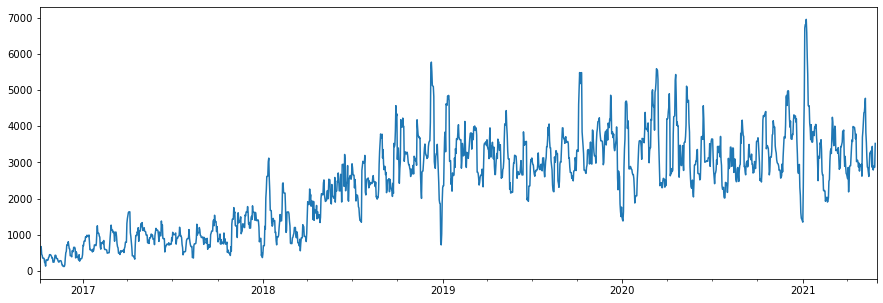

In [44]:
trend_analysis(8)

## Product 8 - Seasonal analysis

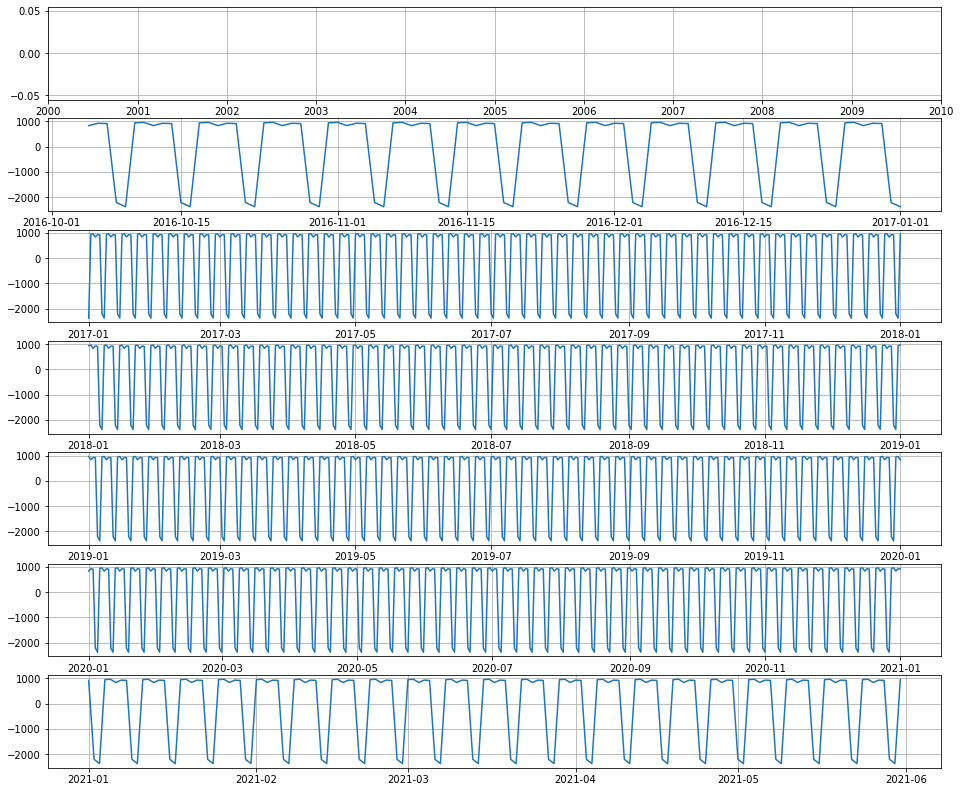

In [45]:
plot_yearly_train_data(seasonal_analysis(df_trains[7]))

# -------------------------------------------------------------------------------------------

## Product 9 - Trend analysis

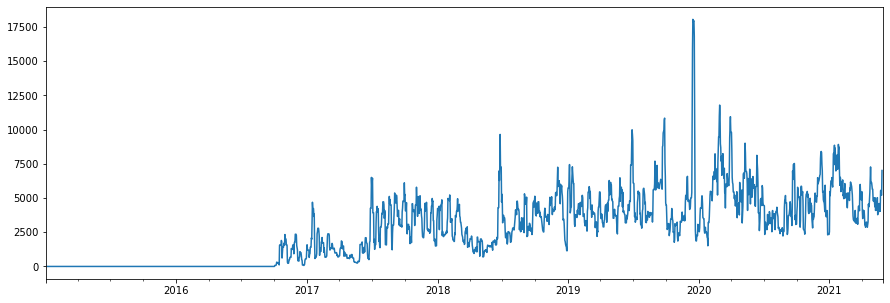

In [46]:
trend_analysis(9)

Change the data to start at the date where it isn't zero for the first time.

In [47]:
df_trains[8].loc[df_trains[8]['volume'] != 0]

volume
2016-10-05     60.000
2016-10-06    500.000
2016-10-10    500.000
2016-10-11   1140.000
2016-10-14    300.000
...               ...
2021-05-27  14290.927
2021-05-28   6536.745
2021-05-29    800.282
2021-05-30     10.528
2021-05-31  14098.186

[1453 rows x 1 columns]

In [48]:
start_9 = '2016-10-05'
df_trains[8] = df_trains[8][start_9:]
df_trains[8]

volume
2016-10-05     60.000
2016-10-06    500.000
2016-10-07      0.000
2016-10-08      0.000
2016-10-09      0.000
...               ...
2021-05-27  14290.927
2021-05-28   6536.745
2021-05-29    800.282
2021-05-30     10.528
2021-05-31  14098.186

[1700 rows x 1 columns]

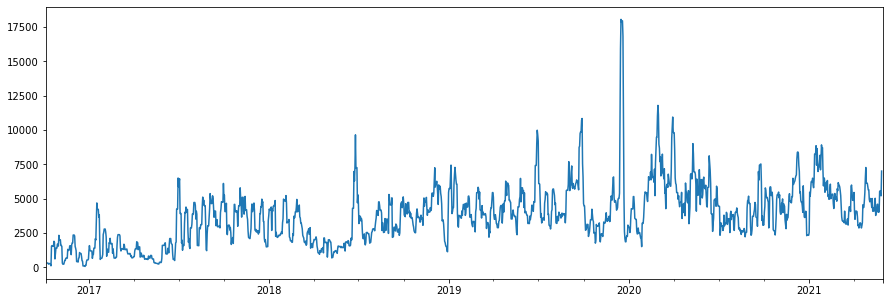

In [49]:
trend_analysis(9)

## Product 9 - Seasonal analysis

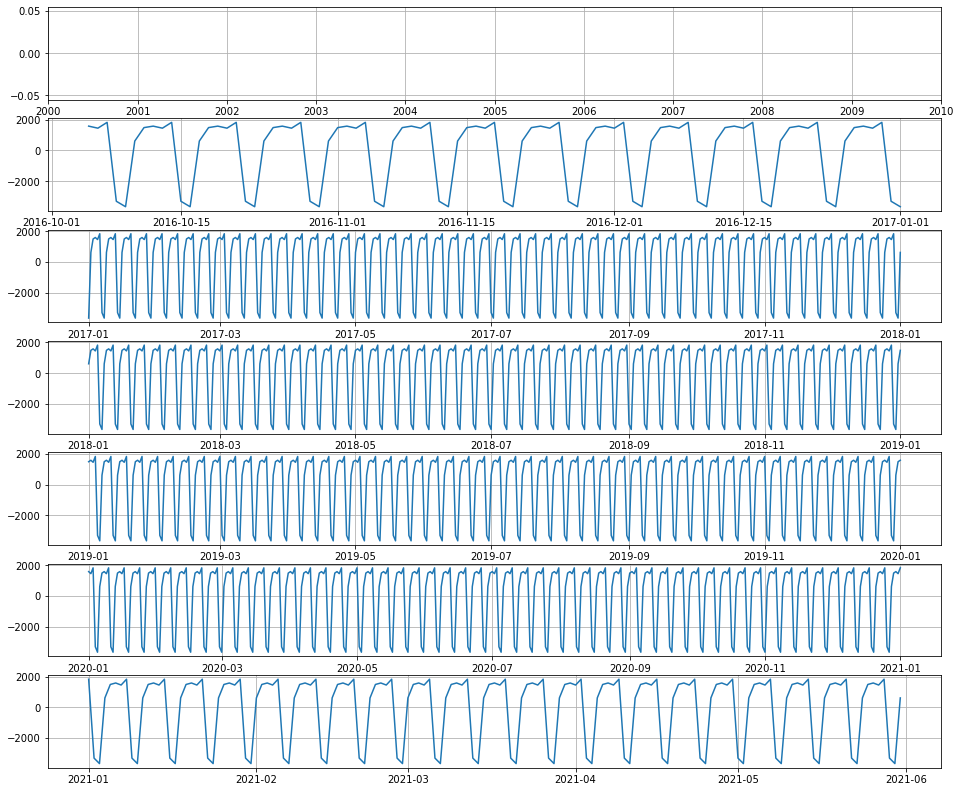

In [50]:
plot_yearly_train_data(seasonal_analysis(df_trains[8]))

# -------------------------------------------------------------------------------------------

## Product 10 -  Trend analysis

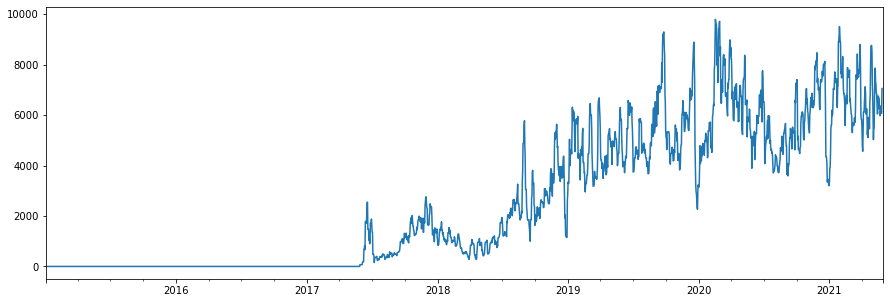

In [51]:
trend_analysis(10)

Change the data to start at the date where it isn't zero for the first time.

In [52]:
df_trains[9].loc[df_trains[9]['volume'] != 0]

volume
2017-06-01    500.000
2017-06-08   1100.000
2017-06-09    200.000
2017-06-12   3500.000
2017-06-13    100.000
...               ...
2021-05-27  10311.313
2021-05-28   7379.598
2021-05-29    300.795
2021-05-30     30.246
2021-05-31  11639.283

[1265 rows x 1 columns]

In [53]:
start_10 = '2017-06-01'
df_trains[9] = df_trains[9][start_10:]
df_trains[9]

volume
2017-06-01    500.000
2017-06-02      0.000
2017-06-03      0.000
2017-06-04      0.000
2017-06-05      0.000
...               ...
2021-05-27  10311.313
2021-05-28   7379.598
2021-05-29    300.795
2021-05-30     30.246
2021-05-31  11639.283

[1461 rows x 1 columns]

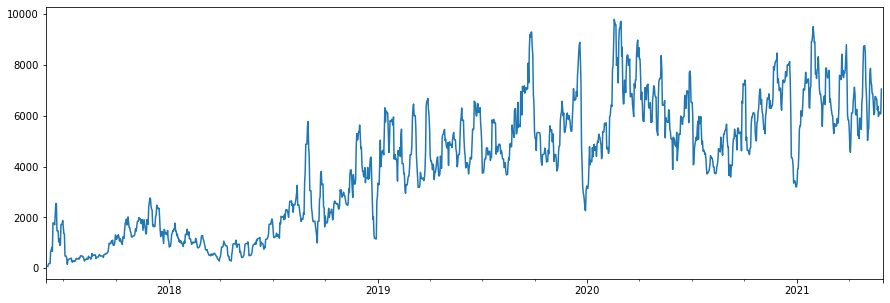

In [54]:
trend_analysis(10)

## Product 10 - Seasonal analysis

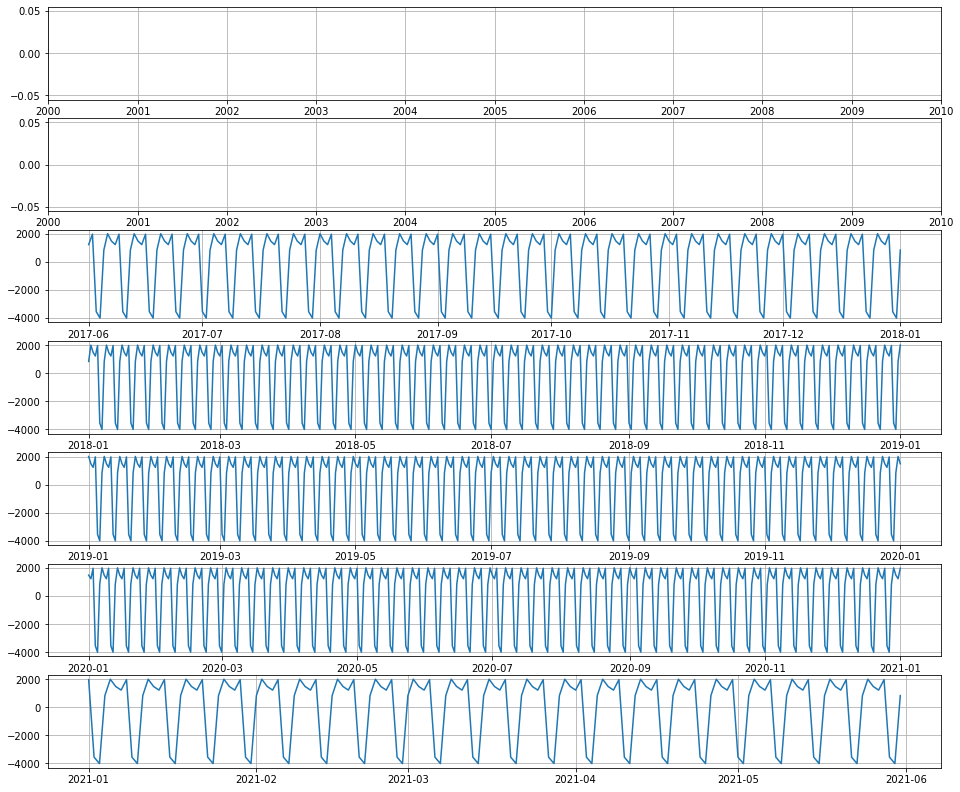

In [55]:
plot_yearly_train_data(seasonal_analysis(df_trains[9]))

From the analysis it seems like all of the products are stationary. 

To further confirm this observation the stationarity need to be tested.


# -------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------

# Stationarity

## Product 1 - Stationarity test

In the following the 'Dickey-Fuller Test' is used to look if the data is stationary. The p-value shows if the hypothesis is valid.
Here the hypothesis is that the data is NOT stationary.

If the p-value is much smaller than $\alpha = 0.05$, the time series is stationary

In [56]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,
                      maxlag=7)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (round(dfoutput,3))

In [57]:
test_stationarity(df_trains[0]['volume'])

Results of Dickey-Fuller Test:
Test Statistic                  -10.830
p-value                           0.000
#Lags Used                        7.000
Number of Observations Used    2334.000
Critical Value (1%)              -3.433
Critical Value (5%)              -2.863
Critical Value (10%)             -2.567
dtype: float64


Since p-value is much smaller than $\alpha = 0.05$, the time series of product 1 is stationary.

# -------------------------------------------------------------------------------------------

## Product 2 - Stationarity test

In [58]:
test_stationarity(df_trains[1]['volume'])

Results of Dickey-Fuller Test:
Test Statistic                  -11.038
p-value                           0.000
#Lags Used                        7.000
Number of Observations Used    2334.000
Critical Value (1%)              -3.433
Critical Value (5%)              -2.863
Critical Value (10%)             -2.567
dtype: float64


Since p-value is much smaller than $\alpha = 0.05$, the time series of product 2 is stationary.

# -------------------------------------------------------------------------------------------

## Product 3 - Stationarity test

In [59]:
test_stationarity(df_trains[2]['volume'])

Results of Dickey-Fuller Test:
Test Statistic                  -12.343
p-value                           0.000
#Lags Used                        6.000
Number of Observations Used    2335.000
Critical Value (1%)              -3.433
Critical Value (5%)              -2.863
Critical Value (10%)             -2.567
dtype: float64


Since p-value is much smaller than $\alpha = 0.05$, the time series of product 3 is stationary.

# -------------------------------------------------------------------------------------------

## Product 4 - Stationarity test

In [60]:
test_stationarity(df_trains[3]['volume'])

Results of Dickey-Fuller Test:
Test Statistic                   -9.860
p-value                           0.000
#Lags Used                        6.000
Number of Observations Used    2335.000
Critical Value (1%)              -3.433
Critical Value (5%)              -2.863
Critical Value (10%)             -2.567
dtype: float64


Since p-value is much smaller than $\alpha = 0.05$, the time series of product 4 is stationary.

# -------------------------------------------------------------------------------------------

## Product 5 - Stationarity test

In [61]:
test_stationarity(df_trains[4]['volume'])

Results of Dickey-Fuller Test:
Test Statistic                   -9.666
p-value                           0.000
#Lags Used                        7.000
Number of Observations Used    2334.000
Critical Value (1%)              -3.433
Critical Value (5%)              -2.863
Critical Value (10%)             -2.567
dtype: float64


Since p-value is much smaller than $\alpha = 0.05$, the time series of product 5 is stationary.

# -------------------------------------------------------------------------------------------

## Product 6 - Stationarity test

In [62]:
test_stationarity(df_trains[5]['volume'])

Results of Dickey-Fuller Test:
Test Statistic                  -15.726
p-value                           0.000
#Lags Used                        6.000
Number of Observations Used    2335.000
Critical Value (1%)              -3.433
Critical Value (5%)              -2.863
Critical Value (10%)             -2.567
dtype: float64


Since p-value is much smaller than $\alpha = 0.05$, the time series of product 6 is stationary.

# -------------------------------------------------------------------------------------------

## Product 7 - Stationarity test

In [63]:
test_stationarity(df_trains[6]['volume'])

Results of Dickey-Fuller Test:
Test Statistic                   -4.901
p-value                           0.000
#Lags Used                        7.000
Number of Observations Used    1693.000
Critical Value (1%)              -3.434
Critical Value (5%)              -2.863
Critical Value (10%)             -2.568
dtype: float64


Since p-value is much smaller than $\alpha = 0.05$, the time series of product 7 is stationary.

# -------------------------------------------------------------------------------------------

## Product 8 - Stationarity test

In [64]:
test_stationarity(df_trains[7]['volume'])

Results of Dickey-Fuller Test:
Test Statistic                   -5.642
p-value                           0.000
#Lags Used                        7.000
Number of Observations Used    1692.000
Critical Value (1%)              -3.434
Critical Value (5%)              -2.863
Critical Value (10%)             -2.568
dtype: float64


Since p-value is much smaller than $\alpha = 0.05$, the time series of product 8 is stationary.

# -------------------------------------------------------------------------------------------

## Product 9 - Stationarity test

In [65]:
test_stationarity(df_trains[8]['volume'])

Results of Dickey-Fuller Test:
Test Statistic                   -8.166
p-value                           0.000
#Lags Used                        7.000
Number of Observations Used    1692.000
Critical Value (1%)              -3.434
Critical Value (5%)              -2.863
Critical Value (10%)             -2.568
dtype: float64


Since p-value is much smaller than $\alpha = 0.05$, the time series of product 9 is stationary.

# -------------------------------------------------------------------------------------------

## Product 10 - Stationarity test

In [66]:
test_stationarity(df_trains[9]['volume'])

Results of Dickey-Fuller Test:
Test Statistic                   -3.599
p-value                           0.006
#Lags Used                        7.000
Number of Observations Used    1453.000
Critical Value (1%)              -3.435
Critical Value (5%)              -2.864
Critical Value (10%)             -2.568
dtype: float64


Since p-value is much smaller than $\alpha = 0.05$, the time series of product 9 is stationary.

For now the not staionary time series will be handled later and the focus will be on the stationary ones.

# -------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------

# Choosing a model

## SARIMA

Since deep learning algorithms are slow compared to ARIMA and part of the task is to make the code run fast, ARIMA is chosen to be used for the predictions.

ARIMA is good for periodic and trending data. 
Since ARIMA can't handle seasonality the more advanced SARIMA can.
Therefore SARIMA is chosen for the analysis and prediction.

# -------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------

# SARIMA Analysis

To get the parameters, the acf- and pacf- graphics for the stationary time series will be plotted

## Getting the parameters - Product 1

In [67]:
# conda install seaborn

In [68]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import seaborn as sns

# define plot function for visualization
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data)
    plot_acf(data, lags=lags, ax=acf, zero=False)
    plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

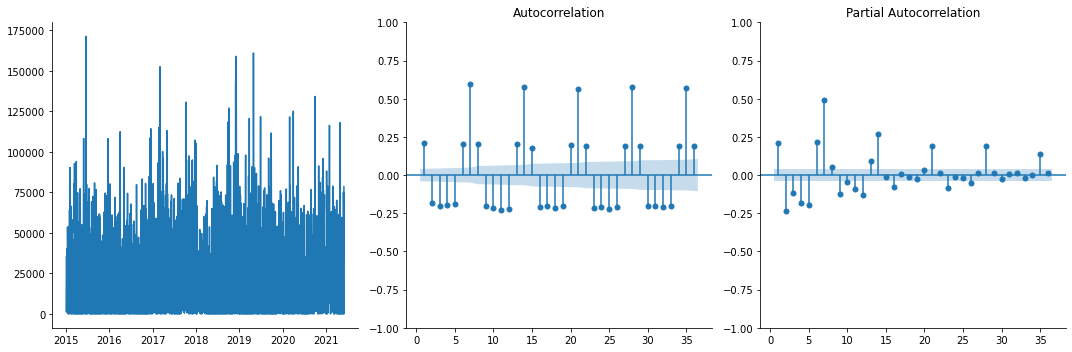

In [69]:
plots(df_trains[0]['volume'], lags=36)

### Choosing Parameter - Product 1

According to the analysis up to this point the following parameter are chosen:

- p and P both equal 1 (significant positive spikes in ACF and PACF plots)
- d and D both equal 0 (no differentiation)
- q and Q both equal 2 (significant negative spikes, PACF decay is more gradual)
- s equal to 7 (weekly seasonal component)


Starting with these values the parameters will be changed to find a better fit.

Since this is a guess made by looking at the plots. The parameters could be computed and ranked according to their prediction error AIC. To keep the Solution fast, this step won't be used.

## Train SARIMA Model - Product 1

In the next step a sarima model will be trained

In [70]:
# !pip install git+https://github.com/statsmodels/statsmodels.git

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#define a function to create a sarima model
def run_sarima(product_num, p, d, q, P, D, Q, s):
    sar = SARIMAX(df_trains[product_num-1]['volume'], 
                                    order=(p,d,q), 
                                    seasonal_order=(P,D,Q,s), 
                                    trend='c').fit(disp=0)
    return sar

Here a sarima model is created with the chosen parameters.

In [72]:
sar_01 = run_sarima(product_num = 1, p = 1, d = 0, q = 2, P = 1, D = 0, Q = 2, s = 7)
sar_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            volume   No. Observations:                 2342
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 7)   Log Likelihood              -26614.283
Date:                           Mon, 13 Jun 2022   AIC                          53244.567
Time:                                   09:53:08   BIC                          53290.637
Sample:                               01-02-2015   HQIC                         53261.348
                                    - 05-31-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.803e+04   5275.427      9.104      0.000    3.77e+04    5.84e+04
ar.L1         -0.9982      0.007   -147.753      0.000      -1.011      -0.985
ma.L1          1.1229      0.025     45.625      0.000       1.075       1.171
ma.L2          0.1256      0.024      5.257      0.000       0.079       0.172
ar.S.L7        0.3324      0.069      4.808      0.000       0.197       0.468
ma.S.L7        0.0547      0.069      0.788      0.431      -0.081       0.191
ma.S.L14       0.2235      0.031      7.151      0.000       0.162       0.285
sigma2      5.458e+08      0.235   2.32e+09      0.000    5.46e+08    5.46e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):              1821.46
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             1.37
Prob(H) (two-sided):                  0.33   Kurtosis:                         6.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.01e+24. Standard errors may be unstable.
"""

## Prediction SARIMA - Product 1

In [73]:
# define function to get a df with true and predicted values
def get_prediction_df(product_num, sar_num):
    df_predict = df_prds[product_num-1].copy()
    df_predict['forecast'] = sar_num.predict(start = start_test, end= end_test)
    return df_predict

Plot the predicted data together with observed data to see how well it fits

<AxesSubplot:>

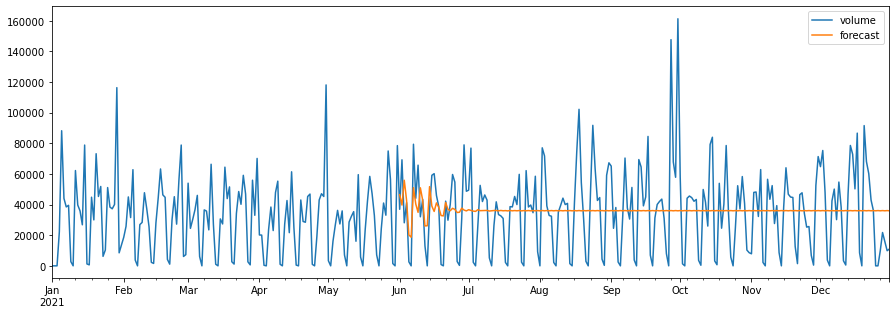

In [74]:
get_prediction_df(1, sar_01)['2021-01-01':][['volume', 'forecast']].plot()

Since the forecast is decaying over time the parameter D changes to 1 since PACF is also decaying.

In [75]:
#create a sarima model for product 1
sar_01 = run_sarima(product_num = 1, p = 1, d = 0, q = 2, P = 1, D = 1, Q = 2, s = 7)
sar_01.summary()

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            volume   No. Observations:                 2342
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 7)   Log Likelihood              -26223.347
Date:                           Mon, 13 Jun 2022   AIC                          52462.694
Time:                                   09:53:18   BIC                          52508.740
Sample:                               01-02-2015   HQIC                         52479.469
                                    - 05-31-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4617      1.360      0.339      0.734      -2.204       3.128
ar.L1          0.9773      0.018     53.263      0.000       0.941       1.013
ma.L1         -0.9039      0.037    -24.476      0.000      -0.976      -0.831
ma.L2         -0.0326      0.033     -0.983      0.326      -0.098       0.032
ar.S.L7       -0.9999      0.036    -28.053      0.000      -1.070      -0.930
ma.S.L7        0.0139      0.064      0.218      0.827      -0.111       0.139
ma.S.L14      -0.9860      0.061    -16.141      0.000      -1.106      -0.866
sigma2      5.214e+08   1.17e-08   4.47e+16      0.000    5.21e+08    5.21e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6066.81
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             1.70
Prob(H) (two-sided):                  0.81   Kurtosis:                        10.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.76e+31. Standard errors may be unstable.
"""


Take a  look at the predicted values in comparison with the real data after changing the D-value.

<AxesSubplot:>

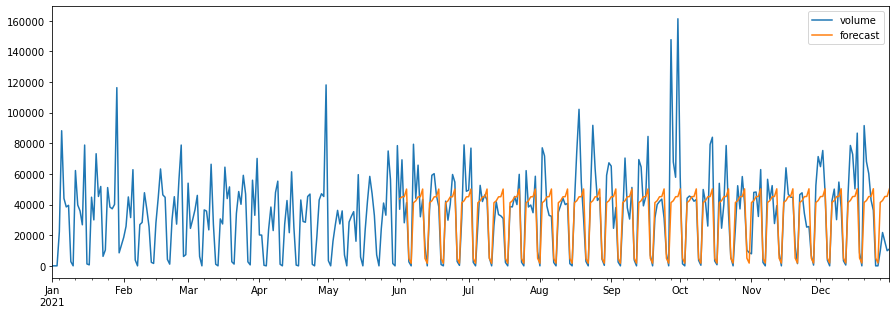

In [76]:
df_prection_01 = get_prediction_df(product_num = 1, sar_num = sar_01)['2021-01-01':][['volume', 'forecast']]
df_prection_01.plot()

Since it seems to fit pretty well, in the next step the MAPE will be calculated.

### MAPE - Product 1

In [77]:
from sklearn.metrics import mean_absolute_percentage_error

def df_months_mean(df_predict_num):
    list_means = []
    
    list_means.append(df_predict_num['2021-06-01':][['volume']].groupby(pd.Grouper(freq='M')).mean())
    
    list_means.append(df_predict_num['2021-06-01':][['forecast']].groupby(pd.Grouper(freq='M')).mean())
    
    return list_means
    
def MAPE_monthly(test_df_monthly, forecast_df_monthly, product_num):
    
    err = mean_absolute_percentage_error(test_df_monthly, forecast_df_monthly)
    print('Product '+str(product_num)+ \
          ':  Mean absolute percentage error (average between 06-2021 and 12-2021): %.3f'% err)

In [78]:
#list of forecast and test means per month of product 1
list_compare_01 = df_months_mean(df_prection_01)
MAPE_monthly(test_df_monthly = list_compare_01[0], 
             forecast_df_monthly = list_compare_01[1], product_num = 1 )

Product 1:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.086


To check how well this model is, in the next step there will be a linear-model for comparison.

### Baseline comparison

Product 1:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.086


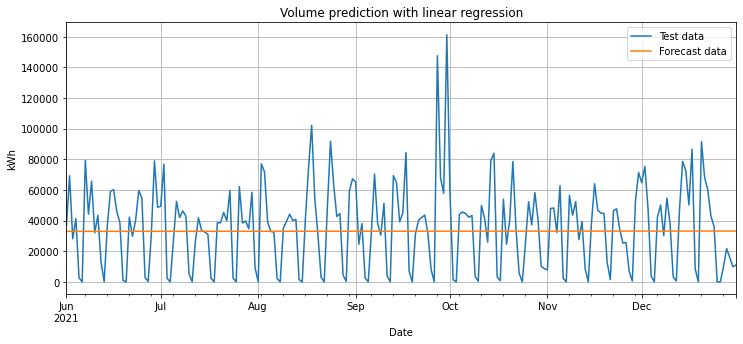

In [79]:
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model


x_train = (df_trains[0].index - df_trains[0].index[0]).days.values.reshape(-1, 1)
y_train = df_trains[0].volume.values.reshape(-1, 1)

x_test = (df_tests[0].index - df_trains[0].index[0]).days.values.reshape(-1,1)
y_test = df_tests[0].volume.values.reshape(-1, 1)

linear_regression_model = linear_model.LinearRegression().fit(x_train,y_train)

regression_pred = linear_regression_model.predict(x_test)
forecast_df = df_tests[0].copy()
forecast_df['volume'] = linear_regression_model.predict(x_test)

fig, ax = plt.subplots(figsize=(12,5))
ax.set(title='Volume prediction with linear regression', xlabel='Date', ylabel='kWh')

df_tests[0].plot(ax=ax)
forecast_df.plot(ax=ax)

legend = ax.legend(["Test data", "Forecast data"])
ax.grid(True)
testdata = df_tests[0]['2021-06-01':][['volume']].groupby(pd.Grouper(freq='M')).mean()
forecast_df = forecast_df['2021-06-01':][['volume']].groupby(pd.Grouper(freq='M')).mean()
MAPE_monthly(test_df_monthly = testdata, forecast_df_monthly = forecast_df, product_num = 1 )

The monthly MAPE seems to be almost equal to the SARIMA model.
Therefore it should get improved.

### Adding holidays

In the next step holidays will be added to see if the predicted data fits better.

Switzerland is chosen to set the holidays.

In [80]:
# conda install holidays

In [81]:
import holidays

holiday_data = holidays.CH()['2015-01-02':'2016-01-01'] + \
                holidays.CH()['2016-01-01':'2017-01-01'] + \
                holidays.CH()['2017-01-01':'2018-01-01'] + \
                holidays.CH()['2018-01-01':'2019-01-01'] + \
                holidays.CH()['2019-01-01':'2020-01-01'] + \
                holidays.CH()['2020-01-01':'2021-01-01'] + \
                holidays.CH()['2021-01-01':end_test]
holiday_data = pd.to_datetime(holiday_data)

Since we have the holidays they can be used as exo_data in SARIMAX

In [82]:
#define a function to create a SARIMAX model
def run_sarimax(product_num, p, d, q, P, D, Q, s):
    exo_data = df_prds[product_num-1].copy()
    temp_train_data = df_prds[product_num-1].copy()
    temp_train_data.drop(["volume"],axis=1,inplace=True)
    temp_train_data["volume"] = df_trains[product_num-1]['volume']
    exo_data["holiday"] = 0
    exo_data.drop(["volume"],axis=1,inplace=True)
    exo_data.loc[holiday_data] = 1

    sarx = SARIMAX(temp_train_data,
                  order=(p,d,q),
                  seasonal_order=(P,D,Q,s),
                  trend='c',
                  exog = exo_data,
                 ).fit(disp=0)
    return sarx

In [83]:
#create a SARIMAX model for product 1
sarx_01 = run_sarimax(product_num = 1, p = 1, d = 0, q = 2, P = 1, D = 1, Q = 2, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Prediction SARIMAX - Product 1

<AxesSubplot:>

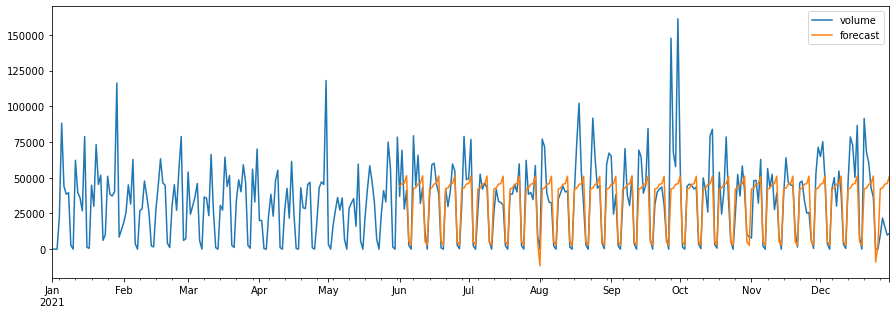

In [84]:
df_prection_01_sarx = get_prediction_df(product_num = 1, sar_num = sarx_01)\
                                                    ['2021-01-01':][['volume', 'forecast']]
df_prection_01_sarx.plot()

In [85]:
#list of forecast and test means per month of product 1
list_compare_01_sarx = df_months_mean(df_prection_01_sarx)
MAPE_monthly(test_df_monthly = list_compare_01_sarx[0], 
             forecast_df_monthly = list_compare_01_sarx[1], product_num = 1 )

Product 1:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.082


Since the MAPE improved a lot and also in the plot the fitting seems to be better, the SARIMAX model is chosen over the SARIMA model for the products.

# -------------------------------------------------------------------------------------------

## Getting the parameters - Product 2

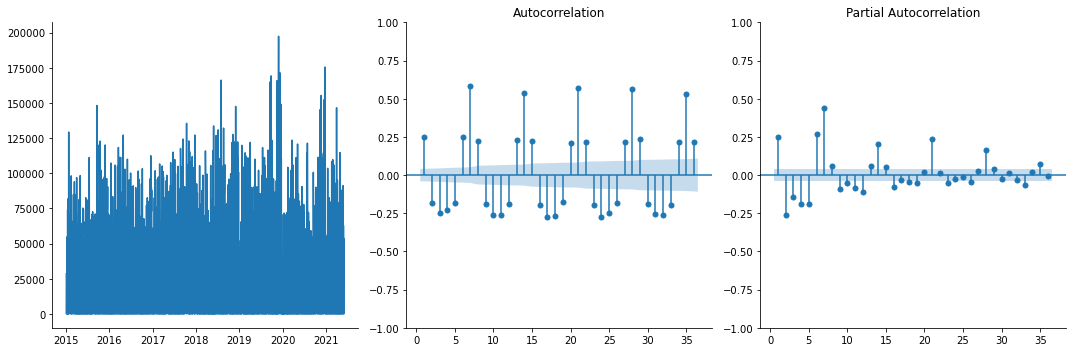

In [86]:
plots(df_trains[1]['volume'], lags=36)

### Choosing Parameter - Product 2

According to the analysis up to this point the following parameter are chosen:

- p and P both equal 1 (significant positive spikes in ACF and PACF plots)
- d equal 0 (no differentiation) and D equal 1 since the decay od PACF
- q and Q both equal 2 (significant negative spikes, PACF decay is more gradual)
- s equal to 7 (weekly seasonal component)

Starting with these values the parameters will be changed to find a better fit.

## Train SARIMAX Model - Product 2

In the next step a SARIMAX model will be trained

In [87]:
#create a SARIMAX model fo product 2
sarx_02 = run_sarimax(product_num = 2, p = 1, d = 0, q = 2, P = 1, D = 1, Q = 2, s = 7)

## Prediction SARIMAX - Product 2

<AxesSubplot:>

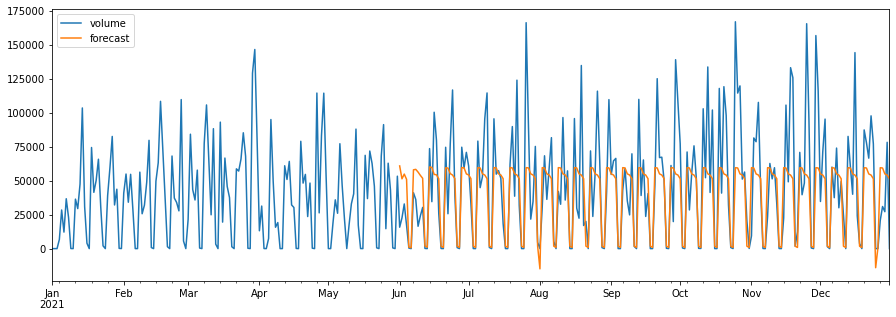

In [88]:
df_prection_02_sarx = get_prediction_df(product_num = 2, sar_num = sarx_02)\
                                                        ['2021-01-01':][['volume', 'forecast']]
df_prection_02_sarx.plot()

In [89]:
#list of forecast and test means per month of product 2
list_compare_02_sarx = df_months_mean(df_prection_02_sarx)
MAPE_monthly(test_df_monthly = list_compare_02_sarx[0], 
             forecast_df_monthly = list_compare_02_sarx[1], product_num = 2)  

Product 2:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.167


### Changing parameters

In [90]:
sarx_02_new_params = run_sarimax(product_num = 2, p = 3, d = 0, q = 1, P = 3, D = 1, Q = 2, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

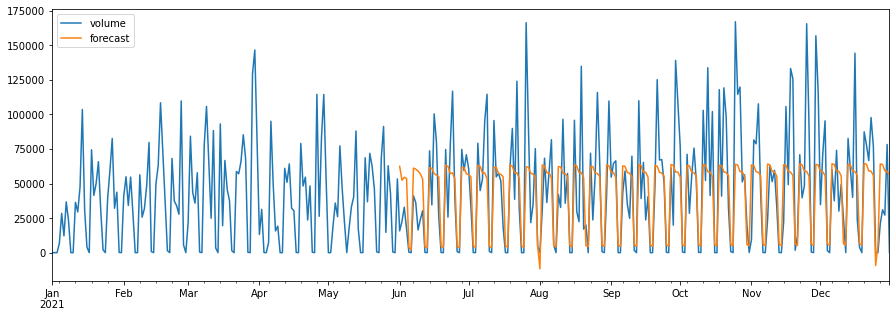

In [91]:
df_prection_02_sarx_new_params = get_prediction_df(product_num = 2, sar_num = sarx_02_new_params)\
                                                                ['2021-01-01':][['volume', 'forecast']]
df_prection_02_sarx_new_params.plot()

In [92]:
list_compare_02_sarx_new_params = df_months_mean(df_prection_02_sarx_new_params)
MAPE_monthly(test_df_monthly = list_compare_02_sarx_new_params[0], 
             forecast_df_monthly = list_compare_02_sarx_new_params[1], product_num = 2)


Product 2:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.115


# -------------------------------------------------------------------------------------------

## Getting the parameters - Product 3

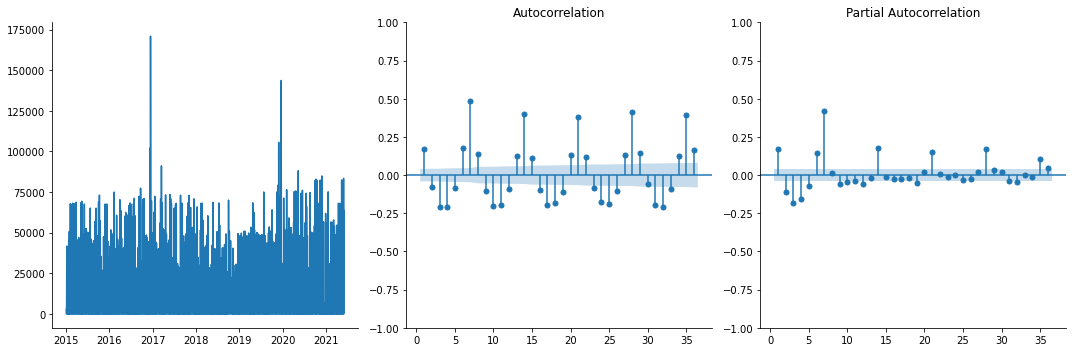

In [93]:
plots(df_trains[2]['volume'], lags=36)

### Choosing Parameter - Product 3

According to the analysis up to this point the following parameter are chosen:

- p and P both equal 1 (significant positive spikes in ACF and PACF plots)
- d equal 0 (no differentiation) and D equal 1 since the decay od PACF
- q and Q both equal 2 (significant negative spikes, PACF decay is more gradual)
- s equal to 7 (weekly seasonal component)


Starting with these values the parameters will be changed to find a better fit.

## Train SARIMAX Model - Product 3

In the next step a SARIMAX model will be trained

In [94]:
#create a SARIMAX model fo product 3
sarx_03 = run_sarimax(product_num = 3, p = 1, d = 0, q = 2, P = 1, D = 1, Q = 2, s = 7)

## Prediction SARIMAX - Product 3

<AxesSubplot:>

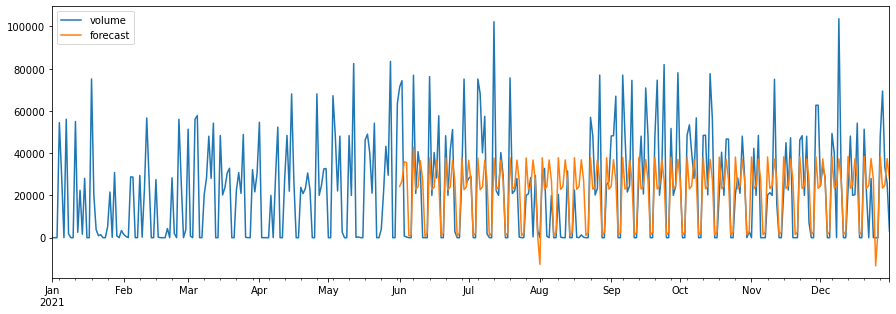

In [95]:
df_prection_03_sarx = get_prediction_df(product_num = 3, sar_num = sarx_03)\
                                                    ['2021-01-01':][['volume', 'forecast']]
df_prection_03_sarx.plot()

In [96]:
list_compare_03_sarx = df_months_mean(df_prection_03_sarx)
MAPE_monthly(test_df_monthly = list_compare_03_sarx[0], 
             forecast_df_monthly = list_compare_03_sarx[1], product_num = 3)


Product 3:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.214


### Changing parameters

In [97]:
sarx_03_new_params = run_sarimax(product_num = 3, p = 0, d = 0, q = 2, P = 2, D = 1, Q = 2, s = 7)

<AxesSubplot:>

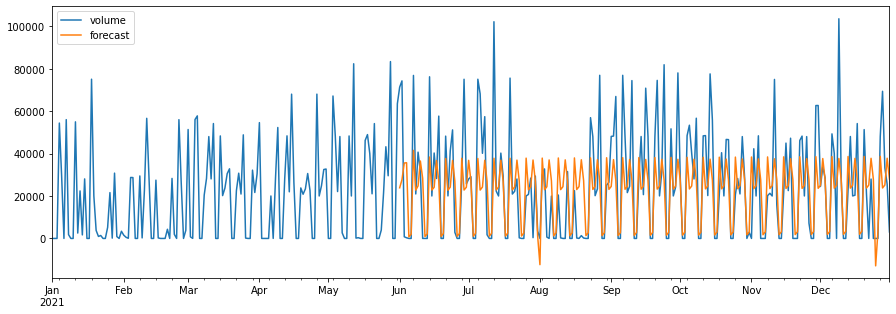

In [98]:
df_prection_03_sarx_new_params = get_prediction_df(product_num = 3, sar_num = sarx_03_new_params)\
                                                                ['2021-01-01':][['volume', 'forecast']]
df_prection_03_sarx_new_params.plot()

In [99]:
list_compare_03_sarx_new_params = df_months_mean(df_prection_03_sarx_new_params)
MAPE_monthly(test_df_monthly = list_compare_03_sarx_new_params[0], 
             forecast_df_monthly = list_compare_03_sarx_new_params[1], product_num = 3)


Product 3:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.208


Since there is a huge drop in august 2021 which didn't happen before, it can't be predicted without more informations.

# -------------------------------------------------------------------------------------------

## Getting the parameters - Product 4

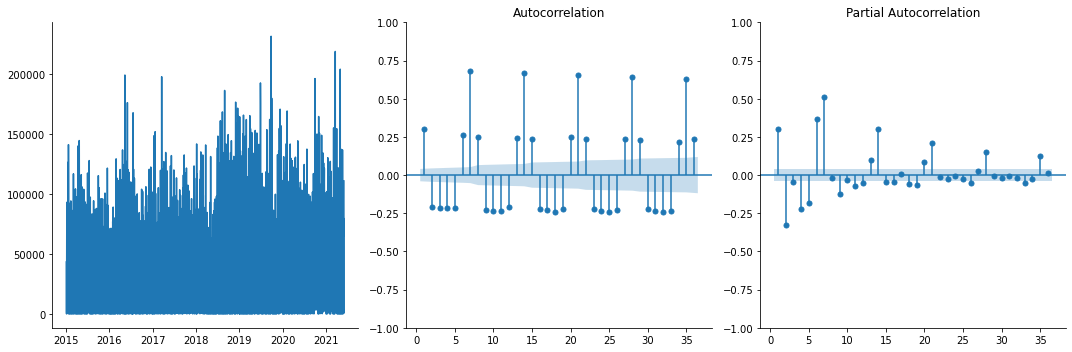

In [100]:
plots(df_trains[3]['volume'], lags=36)

### Choosing Parameter - Product 4

According to the analysis up to this point the following parameter are chosen:

- p and P both equal 1 (significant positive spikes in ACF and PACF plots)
- d equal 0 (no differentiation) and D equal 1 since the decay od PACF
- q and Q both equal 2 (significant negative spikes, PACF decay is more gradual)
- s equal to 7 (weekly seasonal component)


Starting with these values the parameters will be changed to find a better fit.

## Train SARIMAX Model - Product 4

In the next step a SARIMAX model will be trained

In [101]:
#create a SARIMAX model fo product 4
sarx_04 = run_sarimax(product_num = 4, p = 1, d = 0, q = 2, P = 1, D = 1, Q = 2, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Prediction SARIMAX - Product 4

<AxesSubplot:>

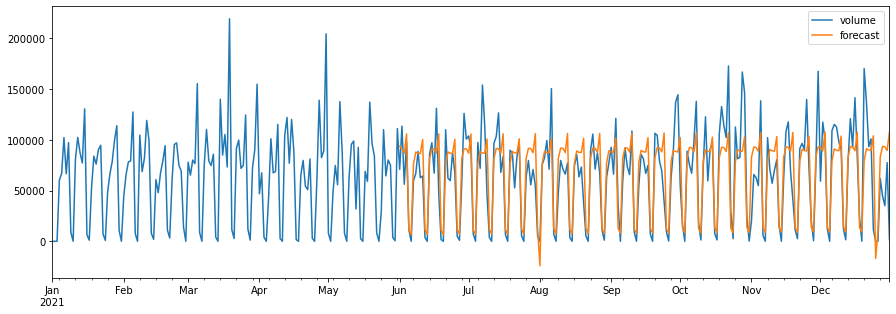

In [102]:
df_prection_04_sarx = get_prediction_df(product_num = 4, sar_num = sarx_04)\
                                                        ['2021-01-01':][['volume', 'forecast']]
df_prection_04_sarx.plot()

In [103]:
list_compare_04_sarx = df_months_mean(df_prection_04_sarx)
MAPE_monthly(test_df_monthly = list_compare_04_sarx[0], 
             forecast_df_monthly = list_compare_04_sarx[1], product_num = 4)


Product 4:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.100


# -------------------------------------------------------------------------------------------

## Getting the parameters - Product 5

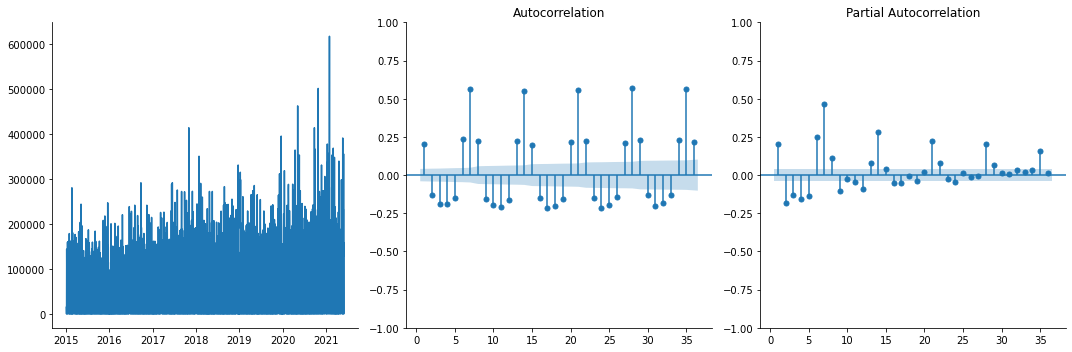

In [104]:
plots(df_trains[4]['volume'], lags=36)

### Choosing Parameter - Product 5

According to the analysis up to this point the following parameter are chosen:

- p and P both equal 1 (significant positive spikes in ACF and PACF plots)
- d equal 0 (no differentiation) and D equal 1 since the decay od PACF
- q and Q both equal 2 (significant negative spikes, PACF decay is more gradual)
- s equal to 7 (weekly seasonal component)


Starting with these values the parameters will be changed to find a better fit.

## Train SARIMAX Model - Product 5

In the next step a SARIMAX model will be trained

In [105]:
#create a SARIMAX model fo product 5
sarx_05 = run_sarimax(product_num = 5, p = 1, d = 0, q = 2, P = 1, D = 1, Q = 2, s = 7)

## Prediction SARIMAX - Product 5

<AxesSubplot:>

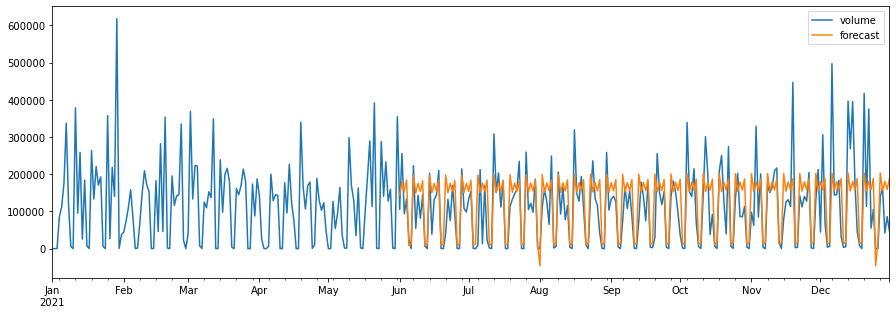

In [106]:
df_prection_05_sarx = get_prediction_df(product_num = 5, sar_num = sarx_05)\
                                                        ['2021-01-01':][['volume', 'forecast']]
df_prection_05_sarx.plot()

In [107]:
list_compare_05_sarx = df_months_mean(df_prection_05_sarx)
MAPE_monthly(test_df_monthly = list_compare_05_sarx[0], 
             forecast_df_monthly = list_compare_05_sarx[1], product_num = 5)


Product 5:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.188


### Changing parameters

In [108]:
sarx_05_new_params = run_sarimax(product_num = 5, p = 0, d = 0, q = 3, P = 1, D = 1, Q = 2, s = 7)

<AxesSubplot:>

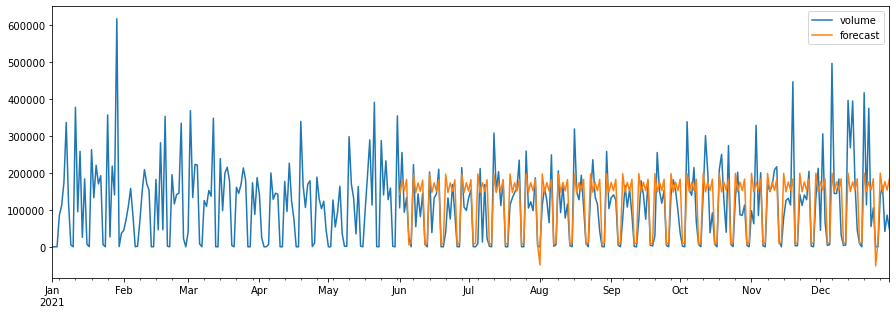

In [109]:
df_prection_05_sarx_new_params = get_prediction_df(product_num = 5, sar_num = sarx_05_new_params)\
                                                                ['2021-01-01':][['volume', 'forecast']]
df_prection_05_sarx_new_params.plot()

In [110]:
list_compare_05_sarx_new_params = df_months_mean(df_prection_05_sarx_new_params)
MAPE_monthly(test_df_monthly = list_compare_05_sarx_new_params[0], 
             forecast_df_monthly = list_compare_05_sarx_new_params[1], product_num = 5)


Product 5:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.167


# -------------------------------------------------------------------------------------------

## Getting the parameters - Product 6

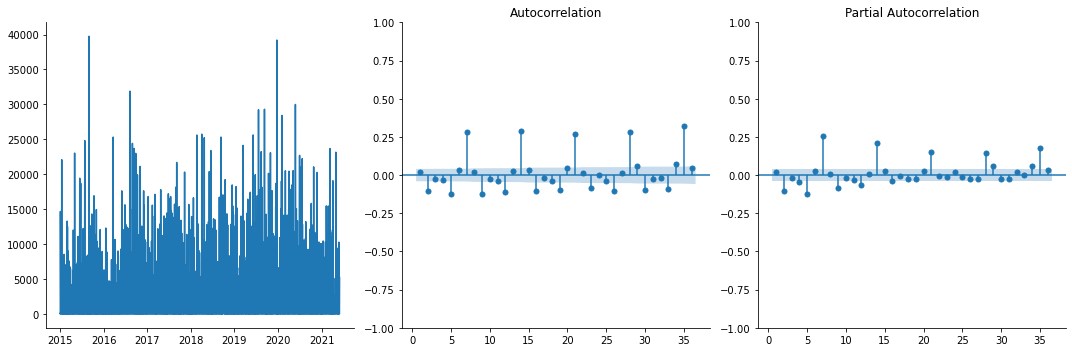

In [111]:
plots(df_trains[5]['volume'], lags=36)

### Choosing Parameter - Product 6

According to the analysis up to this point the following parameter are chosen:

- p and P both equal 2 (significant negative spikes in ACF and PACF plots)
- d ant D both equal 0 (no differentiation)
- q and Q both equal 2 (significant negative spikes, PACF decay is more gradual)
- s equal to 7 (weekly seasonal component)


Starting with these values the parameters will be changed to find a better fit.

# Train SARIMAX Model - Product 6

In the next step a SARIMAX model will be trained

In [112]:
#create a SARIMAX model fo product 6
sarx_06 = run_sarimax(product_num = 6, p = 2, d = 0, q = 2, P = 2, D = 0, Q = 2, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Prediction SARIMAX - Product 6

<AxesSubplot:>

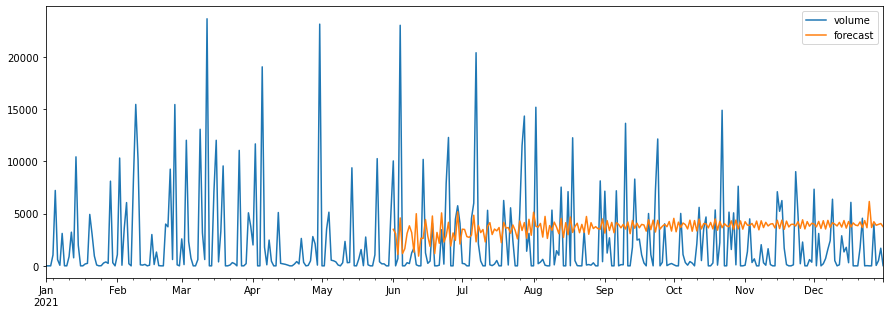

In [113]:
df_prection_06_sarx = get_prediction_df(product_num = 6, sar_num = sarx_06)\
                                                        ['2021-01-01':][['volume', 'forecast']]
df_prection_06_sarx.plot()

In [114]:
list_compare_06_sarx = df_months_mean(df_prection_06_sarx)
MAPE_monthly(test_df_monthly = list_compare_06_sarx[0], 
             forecast_df_monthly = list_compare_06_sarx[1], product_num = 6)


Product 6:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.762


### Changing parameters

In [115]:
sarx_06_new_params = run_sarimax(product_num = 6, p = 3, d = 0, q = 4, P = 0, D = 1, Q = 0, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

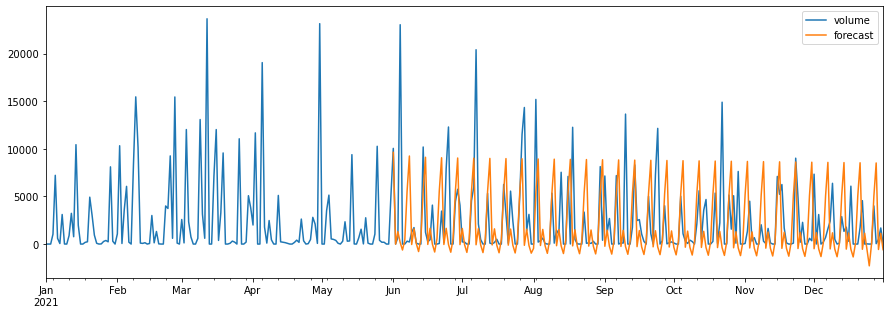

In [116]:
df_prection_06_sarx_new_params = get_prediction_df(product_num = 6, sar_num = sarx_06_new_params)\
                                                                ['2021-01-01':][['volume', 'forecast']]
df_prection_06_sarx_new_params.plot()

In [117]:
list_compare_06_sarx_new_params = df_months_mean(df_prection_06_sarx_new_params)
MAPE_monthly(test_df_monthly = list_compare_06_sarx_new_params[0], 
             forecast_df_monthly = list_compare_06_sarx_new_params[1], product_num = 6)


Product 6:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.215


Product 6 has bigger differences between the training and test data.

# -------------------------------------------------------------------------------------------

## Getting the parameters - Product 7

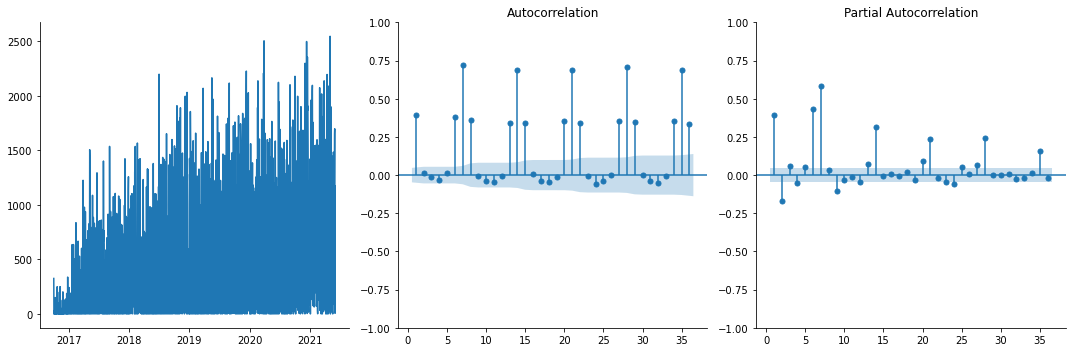

In [118]:
plots(df_trains[6]['volume'], lags=36)

### Choosing Parameter - Product 7

According to the analysis up to this point the following parameter are chosen:

- p and P both equal 1 (significant positive spikes in ACF and PACF plots)
- d equal 0 (no differentiation) and D equal 1 since the decay od PACF
- q and Q both equal 2 (significant negative spikes, PACF decay is more gradual)
- s equal to 7 (weekly seasonal component)


Starting with these values the parameters will be changed to find a better fit.

# Train SARIMAX Model - Product 7

In the next step a SARIMAX model will be trained

In [119]:
#create a SARIMAX model fo product 7
sarx_07 = run_sarimax(product_num = 7, p = 1, d = 0, q = 2, P = 1, D = 1, Q = 2, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Prediction SARIMAX - Product 7

<AxesSubplot:>

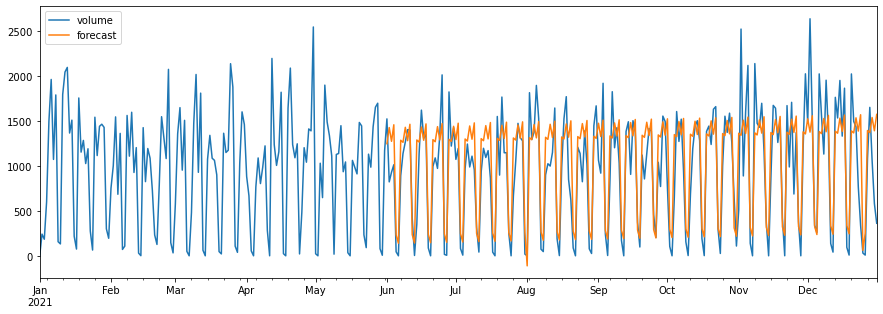

In [120]:
df_prection_07_sarx = get_prediction_df(product_num = 7, sar_num = sarx_07)\
                                                        ['2021-01-01':][['volume', 'forecast']]
df_prection_07_sarx.plot()

In [121]:
list_compare_07_sarx = df_months_mean(df_prection_07_sarx)
MAPE_monthly(test_df_monthly = list_compare_07_sarx[0], 
             forecast_df_monthly = list_compare_07_sarx[1], product_num = 7)


Product 7:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.113


### Changing parameters

In [122]:
sarx_07_new_params = run_sarimax(product_num = 7, p = 1, d = 0, q = 3, P = 1, D = 0, Q = 1, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

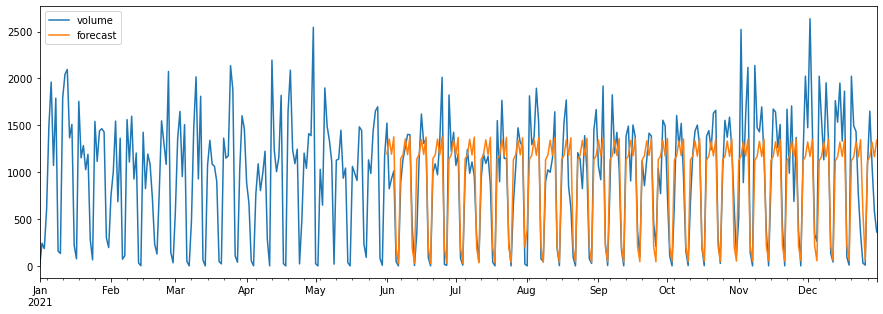

In [123]:
df_prection_07_sarx_new_params = get_prediction_df(product_num = 7, sar_num = sarx_07_new_params)\
                                                                ['2021-01-01':][['volume', 'forecast']]
df_prection_07_sarx_new_params.plot()

In [124]:
list_compare_07_sarx_new_params = df_months_mean(df_prection_07_sarx_new_params)
MAPE_monthly(test_df_monthly = list_compare_07_sarx_new_params[0], 
             forecast_df_monthly = list_compare_07_sarx_new_params[1], product_num = 7)


Product 7:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.071


# -------------------------------------------------------------------------------------------

## Getting the parameters - Product 8

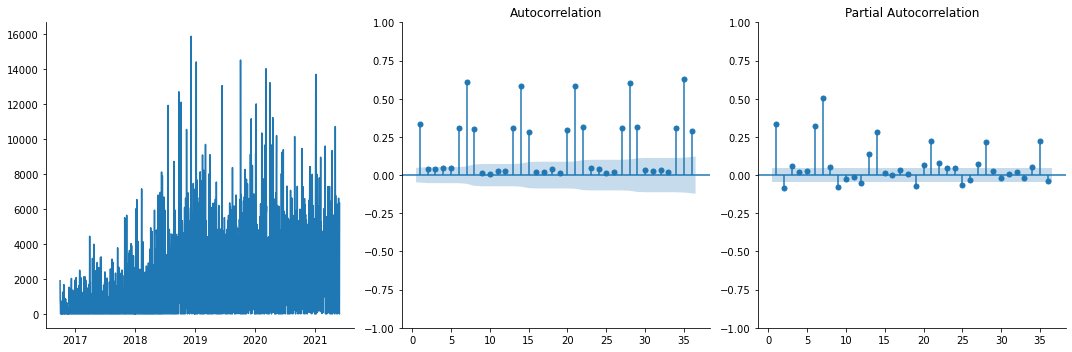

In [125]:
plots(df_trains[7]['volume'], lags=36)

### Choosing Parameter - Product 8

According to the analysis up to this point the following parameter are chosen:

- p and P both equal 1 (significant positive spikes in ACF and PACF plots)
- d equal 0 (no differentiation) and D equal 1 since the decay od PACF
- q and Q both equal 2 (no significant negative spikes, PACF decay is more gradual)
- s equal to 7 (weekly seasonal component)


Starting with these values the parameters will be changed to find a better fit.

# Train SARIMAX Model - Product 8

In the next step a SARIMAX model will be trained

In [126]:
#create a SARIMAX model fo product 8
sarx_08 = run_sarimax(product_num = 8, p = 1, d = 0, q = 2, P = 1, D = 1, Q = 2, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Prediction SARIMAX - Product 8

<AxesSubplot:>

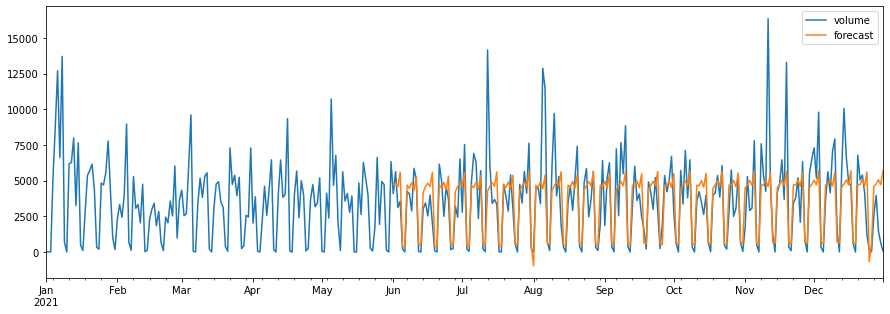

In [127]:
df_prection_08_sarx = get_prediction_df(product_num = 8, sar_num = sarx_08)\
                                                        ['2021-01-01':][['volume', 'forecast']]
df_prection_08_sarx.plot()

In [128]:
list_compare_08_sarx = df_months_mean(df_prection_08_sarx)
MAPE_monthly(test_df_monthly = list_compare_08_sarx[0], 
             forecast_df_monthly = list_compare_08_sarx[1], product_num = 8)


Product 8:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.094


# -------------------------------------------------------------------------------------------

## Getting the parameters - Product 9

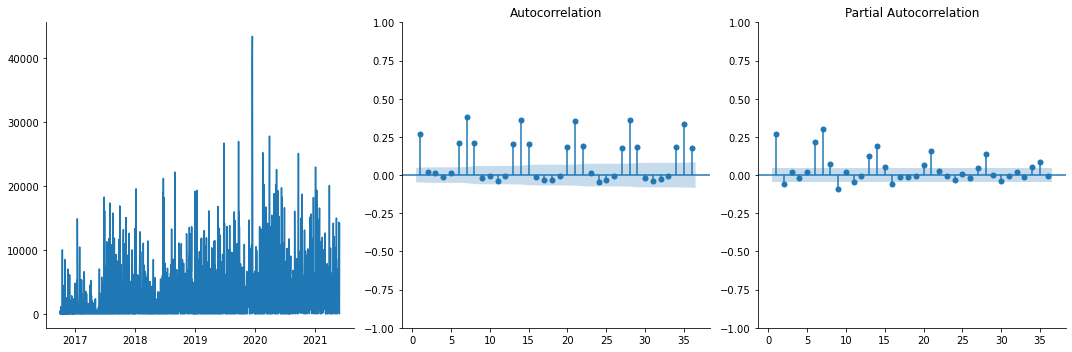

In [129]:
plots(df_trains[8]['volume'], lags=36)

### Choosing Parameter - Product 9

According to the analysis up to this point the following parameter are chosen:

- p and P both equal 1 (significant positive spikes in ACF and PACF plots)
- d equal 0 (no differentiation) and D equal 1 since the decay od PACF
- q and Q both equal 0 (no significant negative spikes, PACF decay is more gradual)
- s equal to 7 (weekly seasonal component)


Starting with these values the parameters will be changed to find a better fit.

# Train SARIMAX Model - Product 9

In the next step a SARIMAX model will be trained

In [130]:
#create a SARIMAX model fo product 9
sarx_09 = run_sarimax(product_num = 9, p = 1, d = 0, q = 0, P = 1, D = 1, Q = 0, s = 7)

## Prediction SARIMAX - Product 9

<AxesSubplot:>

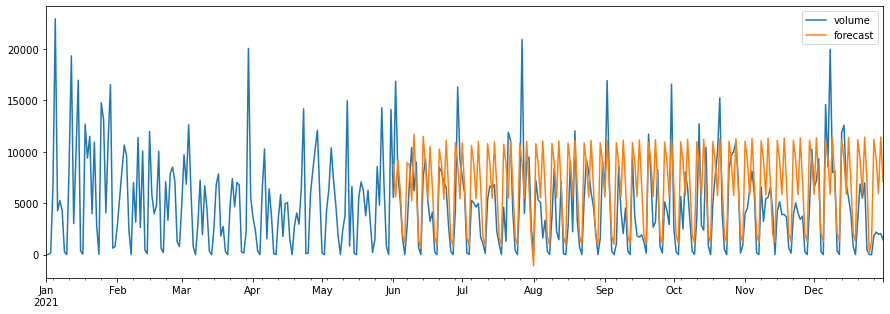

In [131]:
df_prection_09_sarx = get_prediction_df(product_num = 9, sar_num = sarx_09)\
                                                        ['2021-01-01':][['volume', 'forecast']]
df_prection_09_sarx.plot()

In [132]:
list_compare_09_sarx = df_months_mean(df_prection_09_sarx)
MAPE_monthly(test_df_monthly = list_compare_09_sarx[0], 
             forecast_df_monthly = list_compare_09_sarx[1], product_num = 9)


Product 9:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.441


### Changing parameters

In [133]:
sarx_09_new_params = run_sarimax(product_num = 9, p = 3, d = 0, q = 2, P = 0, D = 1, Q = 2, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

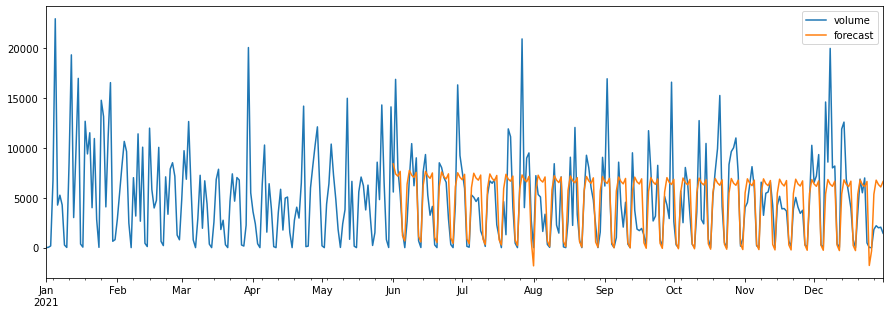

In [134]:
df_prection_09_sarx_new_params = get_prediction_df(product_num = 9, sar_num = sarx_09_new_params)\
                                                                ['2021-01-01':][['volume', 'forecast']]
df_prection_09_sarx_new_params.plot()

In [135]:
list_compare_09_sarx_new_params = df_months_mean(df_prection_09_sarx_new_params)
MAPE_monthly(test_df_monthly = list_compare_09_sarx_new_params[0], 
             forecast_df_monthly = list_compare_09_sarx_new_params[1], product_num = 9)


Product 9:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.101


# -------------------------------------------------------------------------------------------

## Getting the parameters - Product 10

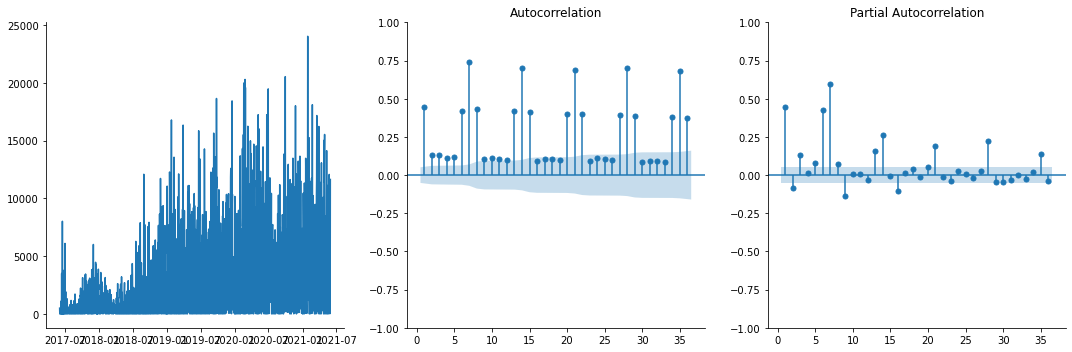

In [136]:
plots(df_trains[9]['volume'], lags=36)

### Choosing Parameter - Product 10

According to the analysis up to this point the following parameter are chosen:

- p and P both equal 1 (significant positive spikes in ACF and PACF plots)
- d equal 0 (no differentiation) and D equal 1 since the decay od PACF
- q and Q both equal 2 (significant negative spikes, PACF decay is more gradual)
- s equal to 7 (weekly seasonal component)


Starting with these values the parameters will be changed to find a better fit.

# Train SARIMAX Model - Product 10

In the next step a SARIMAX model will be trained

In [137]:
#create a SARIMAX model for product 10
sarx_10 = run_sarimax(product_num = 10, p = 1, d = 0, q = 2, P = 1, D = 1, Q = 2, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Prediction SARIMAX - Product 10

<AxesSubplot:>

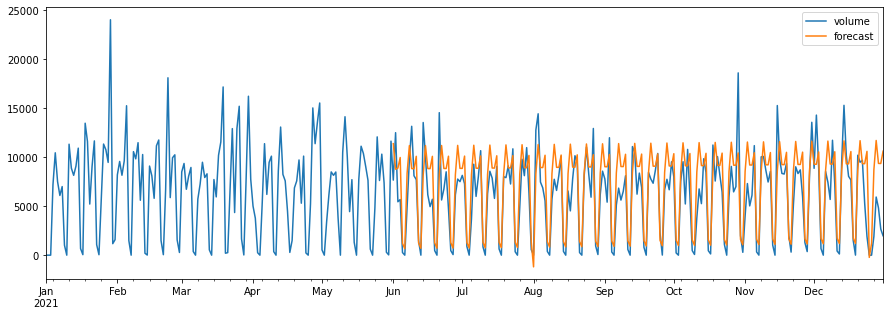

In [138]:
df_prection_10_sarx = get_prediction_df(product_num = 10, sar_num = sarx_10)\
                                                        ['2021-01-01':][['volume', 'forecast']]
df_prection_10_sarx.plot()

In [139]:
list_compare_10_sarx = df_months_mean(df_prection_10_sarx)
MAPE_monthly(test_df_monthly = list_compare_10_sarx[0], 
             forecast_df_monthly = list_compare_10_sarx[1], product_num = 10)


Product 10:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.226


### Changing parameters

In [140]:
sarx_10_new_params = run_sarimax(product_num = 10, p = 2, d = 0, q = 0, P = 1, D = 1, Q = 1, s = 7)

/Users/felix/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

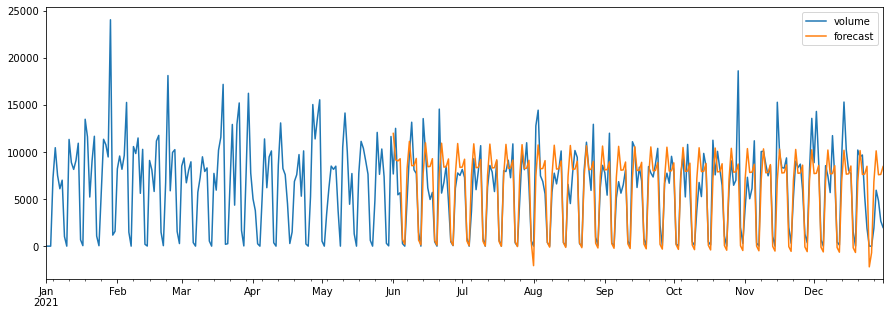

In [141]:
df_prection_10_sarx_new_params = get_prediction_df(product_num = 10, 
                                                   sar_num = sarx_10_new_params)\
                                                    ['2021-01-01':][['volume', 'forecast']]
df_prection_10_sarx_new_params.plot()

In [142]:
list_compare_10_sarx_new_params = df_months_mean(df_prection_10_sarx_new_params)
MAPE_monthly(test_df_monthly = list_compare_10_sarx_new_params[0], 
             forecast_df_monthly = list_compare_10_sarx_new_params[1], product_num = 10)


Product 10:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.057


# -------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------

# RESULTS

# Product 1

### PREDICTION

<AxesSubplot:>

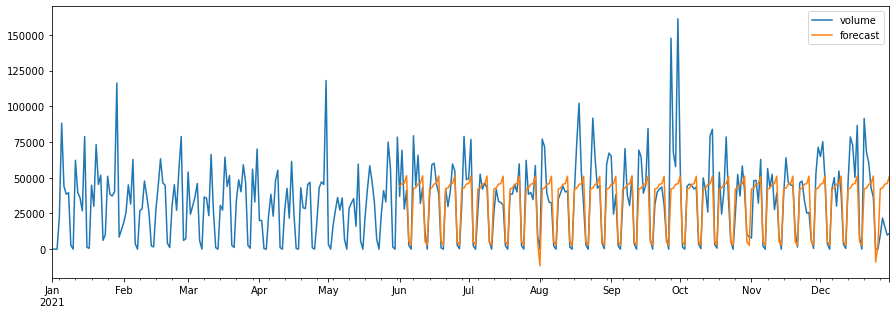

In [143]:
df_prection_01_sarx.plot()

### MAPE

In [144]:
MAPE_monthly(test_df_monthly = list_compare_01_sarx[0], 
             forecast_df_monthly = list_compare_01_sarx[1], product_num = 1 )

Product 1:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.082


# -------------------------------------------------------------------------------------------

# Product 2

### PREDICTION

<AxesSubplot:>

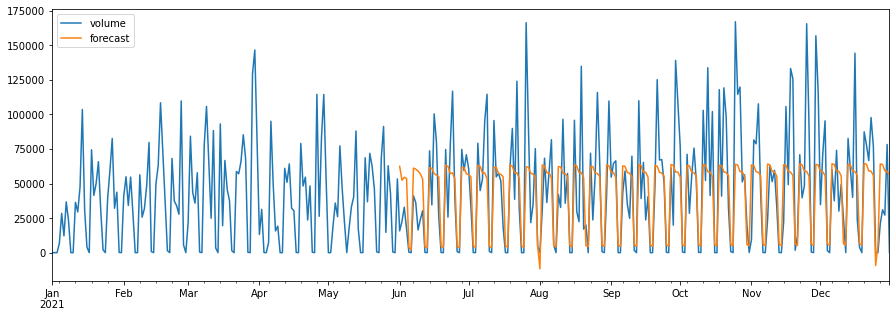

In [145]:
df_prection_02_sarx_new_params.plot()

### MAPE

In [146]:
MAPE_monthly(test_df_monthly = list_compare_02_sarx_new_params[0], 
             forecast_df_monthly = list_compare_02_sarx_new_params[1], product_num = 2)

Product 2:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.115


# -------------------------------------------------------------------------------------------

# Product 3

### PREDICTION

<AxesSubplot:>

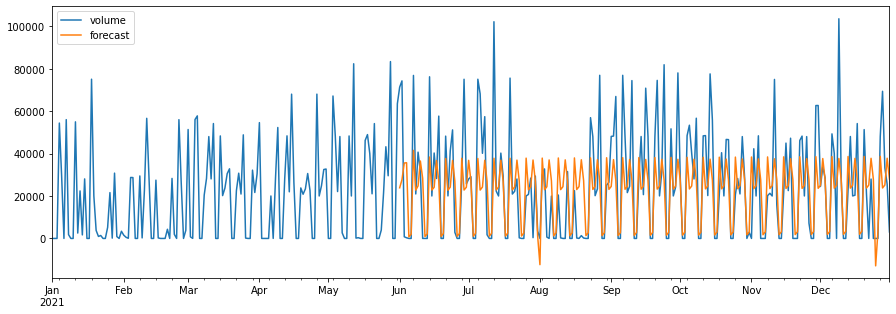

In [147]:
df_prection_03_sarx_new_params.plot()

### MAPE

In [148]:
MAPE_monthly(test_df_monthly = list_compare_03_sarx_new_params[0], 
             forecast_df_monthly = list_compare_03_sarx_new_params[1], product_num = 3)

Product 3:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.208


# -------------------------------------------------------------------------------------------

# Product 4

### PREDICTION

<AxesSubplot:>

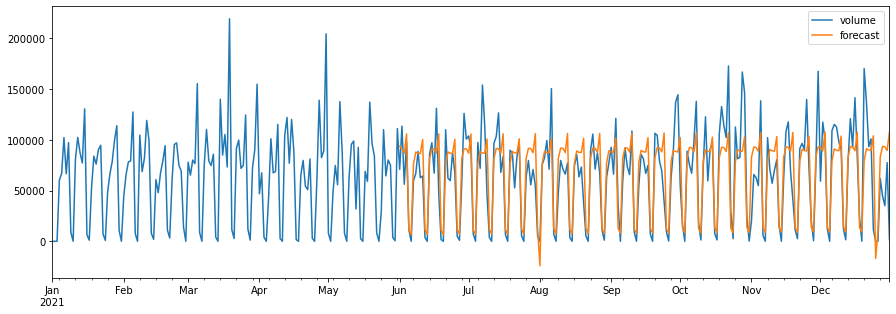

In [149]:
df_prection_04_sarx.plot()

### MAPE

In [150]:
MAPE_monthly(test_df_monthly = list_compare_04_sarx[0], 
             forecast_df_monthly = list_compare_04_sarx[1], product_num = 4)

Product 4:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.100


# -------------------------------------------------------------------------------------------

# Product 5

### PREDICTION

<AxesSubplot:>

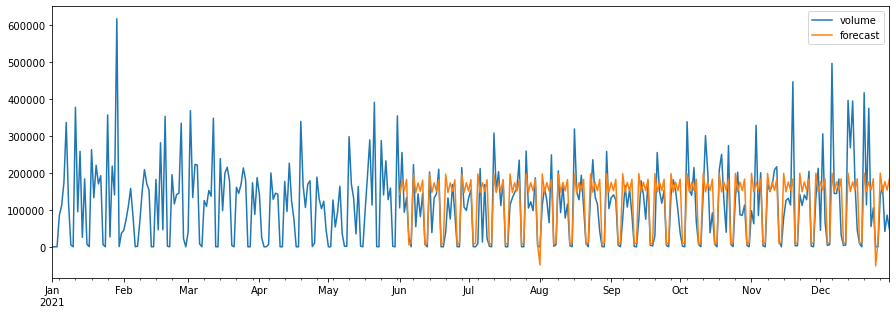

In [151]:
df_prection_05_sarx_new_params.plot()

### MAPE

In [152]:
MAPE_monthly(test_df_monthly = list_compare_05_sarx_new_params[0], 
             forecast_df_monthly = list_compare_05_sarx_new_params[1], product_num = 5)

Product 5:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.167


# -------------------------------------------------------------------------------------------

# Product 6

### PREDICTION

<AxesSubplot:>

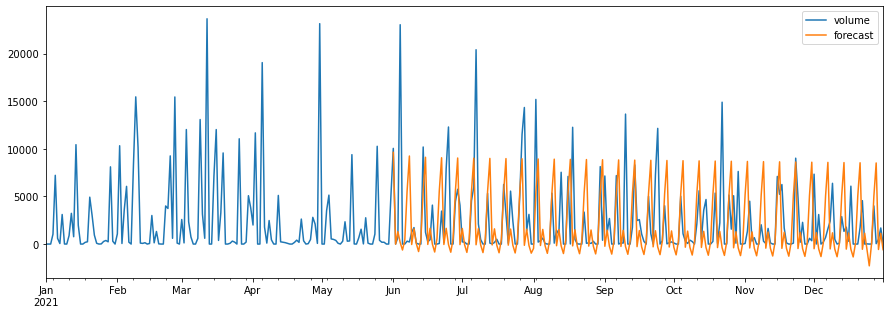

In [153]:
df_prection_06_sarx_new_params.plot()

### MAPE

In [154]:
MAPE_monthly(test_df_monthly = list_compare_06_sarx_new_params[0], 
             forecast_df_monthly = list_compare_06_sarx_new_params[1], product_num = 6)

Product 6:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.215


# -------------------------------------------------------------------------------------------

# Product 7

### PREDICTION

<AxesSubplot:>

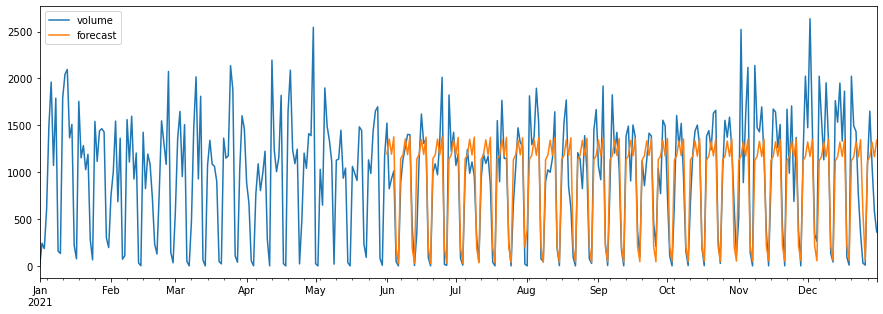

In [155]:
df_prection_07_sarx_new_params.plot()

### MAPE

In [156]:
MAPE_monthly(test_df_monthly = list_compare_07_sarx_new_params[0], 
             forecast_df_monthly = list_compare_07_sarx_new_params[1], product_num = 7)

Product 7:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.071


# -------------------------------------------------------------------------------------------

# Product 8

### PREDICTION

<AxesSubplot:>

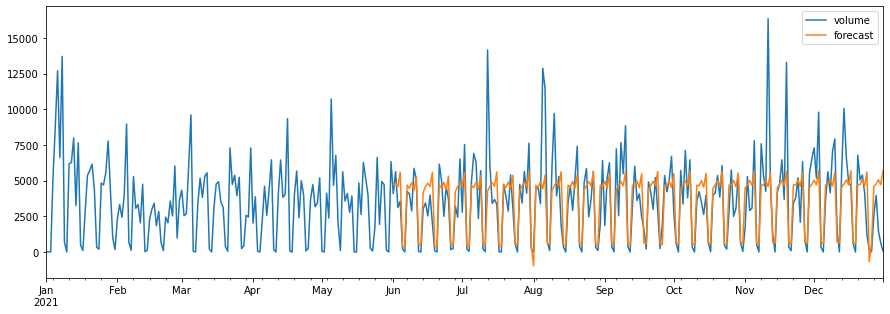

In [157]:
df_prection_08_sarx.plot()

### MAPE

In [158]:
MAPE_monthly(test_df_monthly = list_compare_08_sarx[0], 
             forecast_df_monthly = list_compare_08_sarx[1], product_num = 8)

Product 8:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.094


# -------------------------------------------------------------------------------------------

# Product 9

### PREDICTION

<AxesSubplot:>

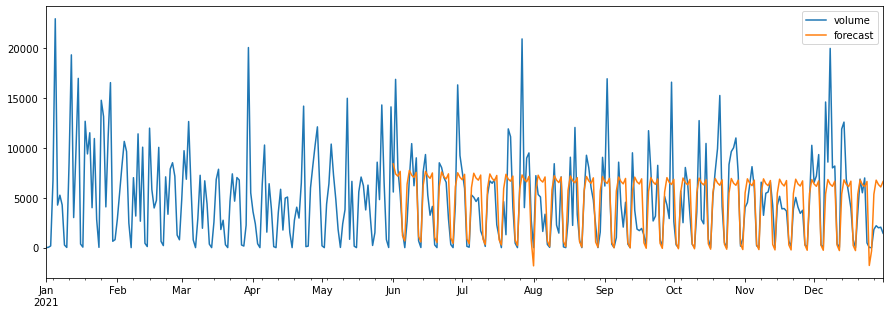

In [159]:
df_prection_09_sarx_new_params.plot()

### MAPE

In [160]:
MAPE_monthly(test_df_monthly = list_compare_09_sarx_new_params[0], 
             forecast_df_monthly = list_compare_09_sarx_new_params[1], product_num = 9)

Product 9:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.101


# -------------------------------------------------------------------------------------------

# Product 10

### PREDICTION

<AxesSubplot:>

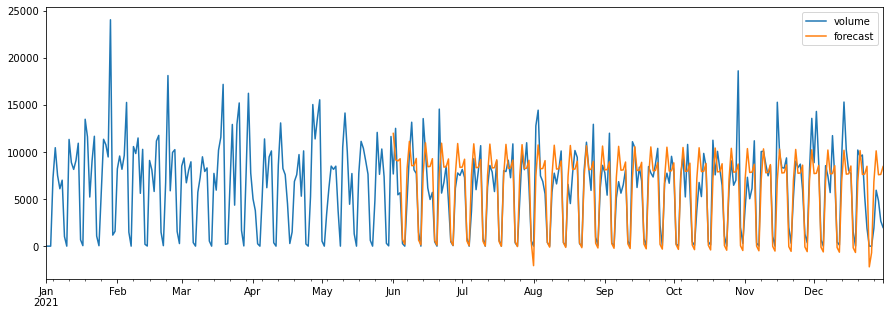

In [161]:
df_prection_10_sarx_new_params.plot()

### MAPE

In [162]:
MAPE_monthly(test_df_monthly = list_compare_10_sarx_new_params[0], 
             forecast_df_monthly = list_compare_10_sarx_new_params[1], product_num = 10)

Product 10:  Mean absolute percentage error (average between 06-2021 and 12-2021): 0.057
